# <center> EDA-DATA-CRUNCHING 

##### Ce projet concerne l'analyse et l'exploration de données brutes afin de s'assurer de sa bonne qualité  
##### Il exploite des données issus de traffic de bus d'une société de la place d'afin d'analyser son activité et fournir des léviers sur lequels la société pourrait agir pour fructifier son activité.

### Chargement  des bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt


> ## I-Traitement des données

> Avant toute utilisation des données pour répondre à des questions, il faudra d'abord s'assurer qu'elles sont traitées convenablement.\
> Nous utilisons des techniques de data crunching tels des jointures, des concaténations ainsi que des contrôles de cohérence pour le traitement des données.

### Chargement des données

In [2]:
df_ticket= pd.read_csv('ticket_data.csv')
df_cities= pd.read_csv('cities.csv')
df_stations= pd.read_csv('stations.csv')
df_providers= pd.read_csv('providers.csv')


### Prise en Main des Données

> On s'assure que les colonnes sont dans le bon format et on se fait un premier aperçu des données.

In [3]:
print(df_ticket.info())
print(df_ticket.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB
None
        id  company  o_station  d_station            departure_ts  \
0  6795025     8385        NaN        NaN  2017-10-13 14:00:00+00   
1  6795026        9       63.0     1044.0 

>La dataframe comporte 74168 lignes et 12 colonnes.\
>Les variables o_station et d_staion ne sont pas au bon format, on les convertit en entier.\
> Les variables de temps n'ont pas les bons types, on les convertit en format datetime.\
> On remarque la présence de valeurs manquantes pour certaines variables.


In [4]:
#df_ticket['o_station']=df_ticket['o_station'].astype(int, errors='ignore')
df_ticket['departure_ts'] = df_ticket['departure_ts'].apply(lambda x: pd.to_datetime(x,infer_datetime_format=True))
df_ticket['arrival_ts'] = df_ticket['arrival_ts'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True))
df_ticket['search_ts'] = df_ticket['search_ts'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True))



In [5]:
#df_ticket[df_ticket['o_station'].isnull()]  41441 lignes

> On vérifie que les colonnes sont à présent au bon format.

In [6]:
df_ticket.dtypes

id                               int64
company                          int64
o_station                      float64
d_station                      float64
departure_ts       datetime64[ns, UTC]
arrival_ts         datetime64[ns, UTC]
price_in_cents                   int64
search_ts          datetime64[ns, UTC]
middle_stations                 object
other_companies                 object
o_city                           int64
d_city                           int64
dtype: object

In [7]:
df_ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542


In [8]:
print(df_cities.info())
print(df_cities.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB
None
      id                     local_name unique_name   latitude  longitude  \
0   5159          Padua, Veneto, Italia       padua  45.406435  11.876761   
1     76    Barcelona, Cataluña, España   barcelona  41.385064   2.173404   
2     81    Basel, Basel-Stadt, Schweiz       basel  47.593437   7.619812   
3    259  Erlangen, Bayern, Deutschland    erlangen  49.589674  11.011961   
4  11979             Balș, Olt, România        balș  44.353354  24.095672   

   population  
0    20967

> La dataframe comporte 8040 lignes et 6 colonnes.\
> Toutes les variables sont au bon formats.\
> On remarque ici également la présence de valeurs manquantes.

In [9]:
print(df_cities['id'].value_counts(),'------------'*5,
      df_cities['unique_name'].value_counts())

5159     1
16       1
168      1
28       1
6114     1
        ..
575      1
6660     1
1382     1
1371     1
11537    1
Name: id, Length: 8040, dtype: int64 ------------------------------------------------------------ padua                   1
alsfeld                 1
caen                    1
angers                  1
chasseneuil-vienne      1
                       ..
neustadt-glewe          1
frynaudour              1
birkenhead              1
bialystok               1
south-cambridgeshire    1
Name: unique_name, Length: 8039, dtype: int64


In [10]:
print(df_stations.info())
print(df_stations.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB
None
   id                     unique_name   latitude  longitude
0   1      Aalen (Stuttgarter Straße)  48.835296  10.092956
1   2      Aéroport Bordeaux-Mérignac  44.830226  -0.700883
2   3                   Aéroport CDG   49.009900   2.559310
3   4  Aéroport de Berlin-Schönefeld   52.389446  13.520345
4   5             Aéroport de Dresden  51.123604  13.764737


> La dataframe comporte 11035 lignes et 4 colonnes.\
> Toutes les variables sont au bon formats.\
> Il n'y a aucune valeur manquante dans la base.

In [11]:
print(df_providers.info())
print(df_providers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB
None
   id  company_id provider_id           name        fullname has_wifi  \
0   9           1         NaN         ouibus          Ouibus     True   
1  10           2         NaN        deinbus      Deinbus.de    False   
2  11           3   

> La dataframe comporte 227 lignes et 10 colonnes.\
> La variable provider_id n'est pas au bon format, on la convertit en entier.\
> On remarque ici également la présence de valeurs manquantes.

> **On regarde de plus prês comment se repartissent les valeurs manquantes dans chaque dataframe.**

In [12]:
df_ticket.isnull().sum()

id                     0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
dtype: int64

> On remarque que 4 variables comprennent chacune 41441 valeurs manquantes.

> On cherche à comprendre la présence de valeurs manquantes dans la base.

In [13]:
df_ticket_null=df_ticket[df_ticket['o_station'].isnull()]
df_ticket_null

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542
5,6795030,8385,NaN,NaN,2017-10-06 05:30:00+00:00,2017-10-06 08:30:00+00:00,1800,2017-10-01 01:03:18.948000+00:00,NaN,NaN,628,453
6,6795031,8385,NaN,NaN,2017-10-06 07:00:42+00:00,2017-10-06 09:30:42+00:00,2150,2017-10-01 01:03:18.948000+00:00,NaN,NaN,628,453
7,6795032,8385,NaN,NaN,2017-10-06 07:10:00+00:00,2017-10-06 09:40:00+00:00,1700,2017-10-01 01:03:18.948000+00:00,NaN,NaN,628,453
8,6795033,8385,NaN,NaN,2017-10-06 10:00:00+00:00,2017-10-06 12:50:00+00:00,1700,2017-10-01 01:03:18.948000+00:00,NaN,NaN,628,453
...,...,...,...,...,...,...,...,...,...,...,...,...
74140,6869165,8385,NaN,NaN,2017-10-27 18:30:00+00:00,2017-10-27 22:50:00+00:00,2900,2017-10-19 10:35:31.269000+00:00,NaN,NaN,628,562
74141,6869166,8385,NaN,NaN,2017-10-27 18:30:00+00:00,2017-10-27 23:10:00+00:00,3000,2017-10-19 10:35:31.269000+00:00,NaN,NaN,628,562
74142,6869167,8385,NaN,NaN,2017-10-27 19:10:00+00:00,2017-10-27 23:00:00+00:00,2650,2017-10-19 10:35:31.269000+00:00,NaN,NaN,628,562
74143,6869168,8385,NaN,NaN,2017-10-27 21:20:00+00:00,2017-10-28 01:10:00+00:00,2900,2017-10-19 10:35:31.269000+00:00,NaN,NaN,628,562


In [14]:
df_ticket_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41441 entries, 0 to 74144
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               41441 non-null  int64              
 1   company          41441 non-null  int64              
 2   o_station        0 non-null      float64            
 3   d_station        0 non-null      float64            
 4   departure_ts     41441 non-null  datetime64[ns, UTC]
 5   arrival_ts       41441 non-null  datetime64[ns, UTC]
 6   price_in_cents   41441 non-null  int64              
 7   search_ts        41441 non-null  datetime64[ns, UTC]
 8   middle_stations  0 non-null      object             
 9   other_companies  0 non-null      object             
 10  o_city           41441 non-null  int64              
 11  d_city           41441 non-null  int64              
dtypes: datetime64[ns, UTC](3), float64(2), int64(5), object(2)
memory usage: 4

> On remarque que les 4 variables ont des valeurs manquantes pour les mêmes identifiants de lignes.

In [15]:
df_ticket_null.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,4.144100e+04,41441.0,0.0,0.0,41441.000000,41441.000000,41441.000000
mean,6.830053e+06,8385.0,NaN,NaN,2742.171907,854.601023,832.716706
std,2.198038e+04,0.0,NaN,NaN,1501.934054,1526.727896,1504.287968
min,6.795025e+06,8385.0,NaN,NaN,300.000000,6.000000,1.000000
25%,6.810668e+06,8385.0,NaN,NaN,1550.000000,485.000000,453.000000
50%,6.828543e+06,8385.0,NaN,NaN,2500.000000,628.000000,562.000000
75%,6.849764e+06,8385.0,NaN,NaN,3600.000000,628.000000,628.000000
max,6.869169e+06,8385.0,NaN,NaN,16150.000000,12190.000000,12166.000000


> Il n'y a pas de raison particulière apparente de la présence de valeurs manquantes.\
> Nous les maintenons pour l'instant dans la base sans leur appliquer un traitement particulier.

In [16]:
df_cities.isnull().sum()

id                0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64

> Deux variables comportent des données manquantes ont une valeur manquante et 7671 autres.

In [17]:
df_cities_null=df_cities[df_cities['population'].isnull()]
df_cities_null

,id,local_name,unique_name,latitude,longitude,population
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
5,10314,"Град Пожаревац, Централна Србија, Србија",град-пожаревац,44.619095,21.176522,NaN
6,11155,"Bussy-Lettrée, Grand-Est, France",bussy-lettree,48.804600,4.259500,NaN
7,11788,"Chamonix, Valle d'Aosta, Italia",chamonix-italia,45.817156,6.952375,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [18]:
df_cities_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 2 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7671 non-null   int64  
 1   local_name   7671 non-null   object 
 2   unique_name  7670 non-null   object 
 3   latitude     7671 non-null   float64
 4   longitude    7671 non-null   float64
 5   population   0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 419.5+ KB


In [19]:
df_cities_null.describe(include='object')

,local_name,unique_name
count,7671,7670
unique,7671,7670
top,"Basel, Basel-Stadt, Schweiz",basel
freq,1,1


> Ici également, il ne semble pas y avoir de raison apparente de la présence de valeurs manquantes dans la colonne population.

In [20]:
df_cities_null=df_cities[df_cities['unique_name'].isnull()]
df_cities_null

,id,local_name,unique_name,latitude,longitude,population
6866,10244,", Hamburg, Deutschland",NaN,39.613402,2.880431,NaN


In [21]:
df_stations.isnull().sum()

id             0
unique_name    0
latitude       0
longitude      0
dtype: int64

> La dataframe ne comporte aucune donnée manquante

In [22]:
df_providers.isnull().sum()

id                       0
company_id               0
provider_id             14
name                     0
fullname                 0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64

> Au total 5 variables comportent des valeurs manquantes. 3 variables comportent chacune 3 valeurs manquantes et une en comporte 14.

In [23]:
df_providers_null=df_providers[df_providers['provider_id'].isnull()]
print(df_providers_null.shape)
df_providers_null

(14, 10)


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
5,14,6,NaN,driivme,DriiveMe,False,False,False,False,car
6,15,8,NaN,alsa,Alsa,False,False,False,False,bus
7,16,9,NaN,distribusion,Distribusion,False,False,False,False,bus
208,4511,10,NaN,vsc,Voyages SNCF,False,False,False,False,train
212,8374,20,NaN,transdev,Transdev,NaN,NaN,NaN,NaN,bus


In [24]:
df_providers_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    14 non-null     int64 
 1   company_id            14 non-null     int64 
 2   provider_id           0 non-null      object
 3   name                  14 non-null     object
 4   fullname              14 non-null     object
 5   has_wifi              11 non-null     object
 6   has_plug              11 non-null     object
 7   has_adjustable_seats  11 non-null     object
 8   has_bicycle           11 non-null     object
 9   transport_type        14 non-null     object
dtypes: int64(2), object(8)
memory usage: 1.2+ KB


In [25]:
df_providers['transport_type'].value_counts()

bus           214
train          10
carpooling      2
car             1
Name: transport_type, dtype: int64

In [26]:
df_providers[df_providers['transport_type']=='car']

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
5,14,6,NaN,driivme,DriiveMe,False,False,False,False,car


> Pas de raison apparente ici également.

> **On regarde si les colonnes comportent rééllement les données qu'elles sont censées avoir.**

In [27]:
df_ticket['price_in_cents'].value_counts()

1700     2799
1800     2735
3600     2704
1550     2036
1450     1788
         ... 
28800       1
20760       1
24060       1
15060       1
8740        1
Name: price_in_cents, Length: 1699, dtype: int64

In [28]:
df_ticket['departure_ts'].value_counts()

2017-10-06 14:00:00+00:00    464
2017-10-06 16:00:00+00:00    407
2017-10-13 18:00:00+00:00    399
2017-10-06 13:00:00+00:00    387
2017-10-13 16:00:00+00:00    381
                            ... 
2017-10-08 12:40:00+00:00      1
2017-10-20 23:25:00+00:00      1
2017-10-20 19:19:00+00:00      1
2017-10-20 18:49:00+00:00      1
2017-10-27 19:40:00+00:00      1
Name: departure_ts, Length: 12660, dtype: int64

In [29]:
df_cities['local_name'].value_counts()

Padua, Veneto, Italia                                  1
Alsfeld, Hessen, Deutschland                           1
Caen, Normandie, France                                1
Angers, Pays-de-la-Loire, France                       1
Chasseneuil Vienne, Nouvelle-Aquitaine, France         1
                                                      ..
Neustadt-Glewe, Mecklenburg-Vorpommern, Deutschland    1
Frynaudour, Bretagne, France                           1
Birkenhead, England, United Kingdom                    1
Białystok, podlaskie, Polska                           1
South Cambridgeshire, England, UK                      1
Name: local_name, Length: 8040, dtype: int64

In [30]:
df_cities['unique_name'].value_counts()

padua                   1
alsfeld                 1
caen                    1
angers                  1
chasseneuil-vienne      1
                       ..
neustadt-glewe          1
frynaudour              1
birkenhead              1
bialystok               1
south-cambridgeshire    1
Name: unique_name, Length: 8039, dtype: int64

In [31]:
df_cities['longitude'].value_counts()

 2.116935     4
 7.716508     3
 22.711711    3
 5.447277     3
 1.642300     3
             ..
 4.829200     1
 1.521440     1
 6.191300     1
 6.209200     1
-0.003400     1
Name: longitude, Length: 7192, dtype: int64

In [32]:
df_cities['latitude'].value_counts()

46.950000    4
48.449306    3
46.652234    3
50.741944    3
43.907300    3
            ..
47.450300    1
52.442000    1
50.061130    1
49.360200    1
52.179600    1
Name: latitude, Length: 7166, dtype: int64

In [33]:
df_stations['unique_name'].value_counts()

Aalen (Stuttgarter Straße)                            1
Saint-Féliu-d'Avall                                   1
Saint-Etienne-de-Boulogne Col d'Auriolles             1
Saint-Etienne-de-Fontbellon                           1
Saint-Etienne-de-Montluc                              1
                                                     ..
Aix-en-Provence - Gare TGV (à 8km du centre ville)    1
Aixe-sur-Vienne                                       1
Aix-les-Bains                                         1
Ajain                                                 1
Wien Hotel ibis Vienna Airport                        1
Name: unique_name, Length: 11035, dtype: int64

In [34]:
df_providers['transport_type'].value_counts()

bus           214
train          10
carpooling      2
car             1
Name: transport_type, dtype: int64

In [35]:
df_providers['name'].value_counts()

ouibus                 1
eberhardtTravel        1
suvarnabhumiBurapha    1
suwannatee             1
swarnaBumiExpress      1
                      ..
cepatSediaExpress      1
chanapaiTour           1
csTravelTours          1
delimaExpress          1
idvroom                1
Name: name, Length: 227, dtype: int64

In [36]:
df_providers['fullname'].value_counts()

Intercités             2
TER                    2
Ouibus                 1
Yasothon Tour          1
Super Nice Express     1
                      ..
Cepat Sedia Express    1
Chanapai Tour          1
CS Travel  Tours       1
Delima Express         1
idVroom                1
Name: fullname, Length: 225, dtype: int64

### Jointure des Bases pour n'en former qu'une seule

In [37]:
print(df_cities['id'].value_counts(),'-----'*10,
df_ticket['o_city'].value_counts(),'-----'*10,
df_ticket['d_city'].value_counts())

5159     1
16       1
168      1
28       1
6114     1
        ..
575      1
6660     1
1382     1
1371     1
11537    1
Name: id, Length: 8040, dtype: int64 -------------------------------------------------- 628      30425
485       6511
126       2388
562       1968
1061      1648
         ...  
100          1
8915         1
9170         1
300          1
11616        1
Name: o_city, Length: 306, dtype: int64 -------------------------------------------------- 628     15364
453      7992
485      7453
562      3578
126      2911
        ...  
147         1
7817        1
9667        1
851         1
8977        1
Name: d_city, Length: 332, dtype: int64


> Bases tickets et cities

> *** L'intuition ici est de chercher les identifiants des villes aussi bien parmi les villes de départ que de destination.\
> Pour ce faire, on effectue deux jointures différentes à l'aide des identifiants des villes de départ et de destination. On concaténe ensuite les deux bases pour n'obtenir qu'une seule base.\
> Puis, on s'assure de supprimer les lignes doublons de la base.

In [38]:
df_o=pd.merge(df_ticket, df_cities, how='left',validate='m:1',
              left_on='o_city',right_on='id', indicator='type_merge').rename(columns={'id_x':'id_ticket',
                                                                                      'local_name':'local_name_o','unique_name':'unique_name_o',
                                                                                      'latitude':'latitude_o','longitude':'longitude_o',
                                                                                      'population':'population_o'})
df_o.head()

,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,id_y,local_name_o,unique_name_o,latitude_o,longitude_o,population_o,type_merge
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both


In [39]:
print(df_o.info())
#print(df_o.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id_ticket        74168 non-null  int64              
 1   company          74168 non-null  int64              
 2   o_station        32727 non-null  float64            
 3   d_station        32727 non-null  float64            
 4   departure_ts     74168 non-null  datetime64[ns, UTC]
 5   arrival_ts       74168 non-null  datetime64[ns, UTC]
 6   price_in_cents   74168 non-null  int64              
 7   search_ts        74168 non-null  datetime64[ns, UTC]
 8   middle_stations  32727 non-null  object             
 9   other_companies  32727 non-null  object             
 10  o_city           74168 non-null  int64              
 11  d_city           74168 non-null  int64              
 12  id_y             74168 non-null  int64              
 13  local_name_o    

In [40]:
df_o['type_merge'].value_counts()

both          74168
left_only         0
right_only        0
Name: type_merge, dtype: int64

> Toutes les lignes de la dataframe de gauche ( Tickets ) se retrouvent dans la dataframe de droite ( cities )\
> Ce qui implique qu'il ne devrait  pas y avoir de valeurs manquantes supplémentaires suite au merge sauf la multiplication issues des lignes avec les mêmes identifiants.

In [41]:
df_d=pd.merge(df_ticket, df_cities, how='left',validate='m:1',
              left_on='d_city',right_on='id', indicator='type_merge').rename(columns={'id_x':'id_ticket',
                                                                                      'local_name':'local_name_d','unique_name':'unique_name_d',
                                                                                      'latitude':'latitude_d','longitude':'longitude_d',
                                                                                      'population':'population_d'})
df_d.head()

,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,id_y,local_name_d,unique_name_d,latitude_d,longitude_d,population_d,type_merge
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both


> On vérifie à l'aide d'un assert :

In [42]:
print(df_d.shape)
assert(df_d.shape[1]==df_ticket.shape[1]+df_cities.shape[1] +1)
print('assert ok.)')

(74168, 19)
assert ok.)


In [43]:
df_d = df_d.filter(items=['id_ticket','local_name_d','unique_name_d','latitude_d','longitude_d'
                          ,'population_d','type_merge'])
df_d.head()

,id_ticket,local_name_d,unique_name_d,latitude_d,longitude_d,population_d,type_merge
0,6795025,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
1,6795026,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
2,6795027,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
3,6795028,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
4,6795029,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both


In [44]:
print(df_d.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id_ticket      74168 non-null  int64   
 1   local_name_d   74168 non-null  object  
 2   unique_name_d  74168 non-null  object  
 3   latitude_d     74168 non-null  float64 
 4   longitude_d    74168 non-null  float64 
 5   population_d   43030 non-null  float64 
 6   type_merge     74168 non-null  category
dtypes: category(1), float64(3), int64(1), object(2)
memory usage: 4.0+ MB
None


In [45]:
df_d['type_merge'].value_counts()

both          74168
left_only         0
right_only        0
Name: type_merge, dtype: int64

> On obtient exactement la même chose qu'avec o_city

> Si l'on faisait un 'outer', on aurait right_only_o : 7734 et right_only_d : 7708

In [46]:
df_merg1=df_o
print(df_merg1.shape)
df_merg1.isnull().sum()

(74168, 19)


id_ticket              0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
id_y                   0
local_name_o           0
unique_name_o          0
latitude_o             0
longitude_o            0
population_o       43430
type_merge             0
dtype: int64

In [47]:
df_cities['population'].isnull().sum()

7671

> Il ya 43430-7671=35759  valeurs manquantes supplémentaires pour la variable population qui proviennent de la duplication des lignes avec les mêmes identifiants.

> Il n'y a pas eu de données manquantes supplémentaires pour les colonnes de gauche suite au merge.

In [48]:
df_merg2=df_d
print(df_merg2.shape)
df_merg2.isnull().sum()

(74168, 7)


id_ticket            0
local_name_d         0
unique_name_d        0
latitude_d           0
longitude_d          0
population_d     31138
type_merge           0
dtype: int64

>  **Jointure des deux bases obtenues**

In [49]:
#df=pd.concat([df_merg1,df_merg2])
df = pd.merge(df_merg1.drop(columns=['type_merge']),df_merg2.drop(columns=['type_merge']), how='left',validate='1:1',
              on='id_ticket', indicator='type_merge')
print(df.shape)
df.head()

(74168, 24)


,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,unique_name_o,latitude_o,longitude_o,population_o,local_name_d,unique_name_d,latitude_d,longitude_d,population_d,type_merge
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,both


> On vérifie que la concaténation s'est bien passée avec un 'assert'

In [50]:
print(df.shape)
assert(df.shape[1]==df_merg1.shape[1]+df_merg2.shape[1]-2)
print('assert ok')

(74168, 24)
assert ok


In [51]:
df_copy=df.drop(['type_merge'], axis=1)

> **Ajout de la base des stations**

In [52]:
print(df_stations.shape[0])
df_stations['id'].value_counts()

11035


1        1
7361     1
7353     1
7354     1
7355     1
        ..
3680     1
3681     1
3682     1
3683     1
11036    1
Name: id, Length: 11035, dtype: int64

> La colonne 'id' constitue une clef pour la dataframe stations.

In [53]:
df_merge_o1=pd.merge(df_copy, df_stations, how='left',validate='m:1',
              left_on='o_station',right_on='id', indicator='type_merge').rename(columns={
                  'unique_name':'unique_name_so',	'latitude':'latitude_so','longitude':'longitude_so'
              })
df_merge_o1.head()

,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,local_name_d,unique_name_d,latitude_d,longitude_d,population_d,id,unique_name_so,latitude_so,longitude_so,type_merge
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,NaN,NaN,NaN,NaN,left_only
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,63.0,Avenue Georges Pompidou,47.896911,1.854277,both
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,both
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,both
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,both


> On vériefie que le merge s'est bien passé notamment en ce qui concerne les valeurs manquantes

In [54]:
print(df_merge_o1.shape)
assert(df_merge_o1.shape[1]==df_copy.shape[1]+df_stations.shape[1] +1)
print('assert ok')

(74168, 28)
assert ok


In [55]:
df_merge_o1['type_merge'].value_counts()

left_only     41441
both          32727
right_only        0
Name: type_merge, dtype: int64

In [56]:
df_merge_o1.isnull().sum()

id_ticket              0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
id_y                   0
local_name_o           0
unique_name_o          0
latitude_o             0
longitude_o            0
population_o       43430
local_name_d           0
unique_name_d          0
latitude_d             0
longitude_d            0
population_d       31138
id                 41441
unique_name_so     41441
latitude_so        41441
longitude_so       41441
type_merge             0
dtype: int64

In [57]:
df_copy.isnull().sum()

id_ticket              0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
id_y                   0
local_name_o           0
unique_name_o          0
latitude_o             0
longitude_o            0
population_o       43430
local_name_d           0
unique_name_d          0
latitude_d             0
longitude_d            0
population_d       31138
dtype: int64

> Des lignes comportant des données manquantes ont été ajoutées correspondant  à celles qui n'ont pas été retrouvées  dans la base de droite (stations).\
> Les colonnes avec les mêmes noms dans les deux bases ont été modifiées avec l'ajout des suffixes x ou y. Nous les rénommerons dans la suite pour éviter toute confusion.

In [58]:
df_merge_d1=pd.merge(df_copy, df_stations, how='left',validate='m:1',
              left_on='d_station',right_on='id', indicator='type_merge').rename(columns={
                  'unique_name':'unique_name_sd',	'latitude':'latitude_sd','longitude':'longitude_sd'
              })
df_merge_d1.head()

,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,local_name_d,unique_name_d,latitude_d,longitude_d,population_d,id,unique_name_sd,latitude_sd,longitude_sd,type_merge
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,NaN,NaN,NaN,NaN,left_only
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,1044.0,Station Les Sabines,43.583932,3.860233,both
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,6495.0,Montpellier,43.604900,3.880500,both
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,6495.0,Montpellier,43.604900,3.880500,both
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,6495.0,Montpellier,43.604900,3.880500,both


In [59]:
print(df_merge_d1.shape)
assert(df_merge_d1.shape[1]==df_copy.shape[1]+df_stations.shape[1] +1)
print('assert ok')

(74168, 28)
assert ok


In [60]:
df_merge_d1 = df_merge_d1.filter(items=['id_ticket','unique_name_sd','latitude_d','longitude_sd'
                          ,'type_merge'])
df_merge_d1.head()

,id_ticket,unique_name_sd,latitude_d,longitude_sd,type_merge
0,6795025,NaN,43.604452,NaN,left_only
1,6795026,Station Les Sabines,43.604452,3.860233,both
2,6795027,Montpellier,43.604452,3.880500,both
3,6795028,Montpellier,43.604452,3.880500,both
4,6795029,Montpellier,43.604452,3.880500,both


In [61]:
df_merge_d1['type_merge'].value_counts()

left_only     41441
both          32727
right_only        0
Name: type_merge, dtype: int64

In [62]:
df_merge_d1.isnull().sum()

id_ticket             0
unique_name_sd    41441
latitude_d            0
longitude_sd      41441
type_merge            0
dtype: int64

> On fait la jointure des deux dataframes

In [63]:
#df_copy1= pd.concat([df_merge_o1,df_merge_d1])
#df_copy1.head()

df_copy1=pd.merge(df_merge_o1.drop(columns=['type_merge']),df_merge_d1.drop(columns=['type_merge']), how='left',validate='1:1',
              on='id_ticket', indicator='type_merge')
print(df_copy1.shape)
df_copy1.head()

(74168, 31)


,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,longitude_d,population_d,id,unique_name_so,latitude_so,longitude_so,unique_name_sd,latitude_d_y,longitude_sd,type_merge
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,...,3.918318,275318.0,NaN,NaN,NaN,NaN,NaN,43.604452,NaN,both
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,3.918318,275318.0,63.0,Avenue Georges Pompidou,47.896911,1.854277,Station Les Sabines,43.604452,3.860233,both
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",...,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,Montpellier,43.604452,3.880500,both
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",...,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,Montpellier,43.604452,3.880500,both
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},...,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,Montpellier,43.604452,3.880500,both


> On obtient le même constat en considérant les stations de destination

> On vérifie que tout est ok

In [64]:
print(df_copy1.shape)
assert(df_copy1.shape[1]==df_merge_o1.shape[1]+df_merge_d1.shape[1]-2)
print('assert ok')

(74168, 31)
assert ok


In [65]:
print(df_copy1.shape)
print(df_merge_o1.shape)

(74168, 31)
(74168, 28)


In [66]:
df_copy1.isnull().sum()

id_ticket              0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
id_y                   0
local_name_o           0
unique_name_o          0
latitude_o             0
longitude_o            0
population_o       43430
local_name_d           0
unique_name_d          0
latitude_d_x           0
longitude_d            0
population_d       31138
id                 41441
unique_name_so     41441
latitude_so        41441
longitude_so       41441
unique_name_sd     41441
latitude_d_y           0
longitude_sd       41441
type_merge             0
dtype: int64

> Les valeurs manquantes dans les colonnes n'ont pas changé .\
> En effet, on vérifie que:

In [67]:
print(df_copy1['population_o'].isnull().sum())
print(df_copy1['population_d'].isnull().sum())

43430
31138


In [68]:
print(df_merge_o1['population_o'].isnull().sum())
print(df_merge_o1['population_d'].isnull().sum())

43430
31138


> **Ajout de la base Providers**

In [69]:
df_ticket['company'].value_counts()

8385    41441
8376     8654
13       7433
8380     6763
9        3560
8377     2193
8371     1607
8384      796
8372      725
8382      509
71        252
8379      170
8387       16
216        16
8381       14
10          9
12          5
173         3
192         1
33          1
Name: company, dtype: int64

In [70]:
df_providers['company_id'].value_counts()

9     201
10     11
20      4
1       1
2       1
3       1
4       1
5       1
6       1
8       1
11      1
30      1
40      1
12      1
Name: company_id, dtype: int64

In [71]:
df=df_copy1
df=pd.merge(df.drop(columns=['type_merge']), df_providers, how='left',validate='m:m',
              left_on='company',right_on='company_id', indicator='type_merge')
df.head()

,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,type_merge
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,9.0,NaN,distribusion,Distribusion,False,False,False,False,bus,both
2,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,9.0,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus,both
3,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,9.0,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus,both
4,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,9.0,37,ostfrieslandexpress,OstfrieslandExpress,False,False,False,False,bus,both


In [72]:
df['type_merge'].value_counts()

both          715664
left_only      70594
right_only         0
Name: type_merge, dtype: int64

In [73]:
df.isnull().sum()

id_ticket                    0
company                      0
o_station                41441
d_station                41441
departure_ts                 0
arrival_ts                   0
price_in_cents               0
search_ts                    0
middle_stations          41441
other_companies          41441
o_city                       0
d_city                       0
id_y                         0
local_name_o                 0
unique_name_o                0
latitude_o                   0
longitude_o                  0
population_o            406830
local_name_d                 0
unique_name_d                0
latitude_d_x                 0
longitude_d                  0
population_d            337598
id_x                     41441
unique_name_so           41441
latitude_so              41441
longitude_so             41441
unique_name_sd           41441
latitude_d_y                 0
longitude_sd             41441
id_y                     70594
company_id               70594
provider

In [74]:
df.isnull().sum()[25:]

latitude_so             41441
longitude_so            41441
unique_name_sd          41441
latitude_d_y                0
longitude_sd            41441
id_y                    70594
company_id              70594
provider_id             74168
name                    70594
fullname                70594
has_wifi                70594
has_plug                70594
has_adjustable_seats    70594
has_bicycle             70594
transport_type          70594
type_merge                  0
dtype: int64

> On remarque la présence de données manquantes dans les nouvelles colonnes qui ont été ajoutés à la dataframe.\
> Ces données manquantes correspondent aux lignes de la base de droite ( providers ) qui n'ont pas été retrouvées dans la base de gauche ( df ) sauf pour les colonnes population et provider_id.\
> Nous chercherons une explication à cela.

In [75]:
df_providers['provider_id'].isnull().sum()

14

> La colonne provider_id comportait 14 valeurs manquantes avant le merge. Elle en comporte 74168 après dont 70594 issues des lignes qui ne sont pas dans la dataframe de droite.\
Le reste(3574) proviennent probablement du fait que les colonnes utilisées pour le merge comportent des doublons des deux côtés.\
La même justification est valable pour les colonnes populations.

> On supprime certaines  colonnes non nécessaires.

In [76]:
df.columns

Index(['id_ticket', 'company', 'o_station', 'd_station', 'departure_ts',
       'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations',
       'other_companies', 'o_city', 'd_city', 'id_y', 'local_name_o',
       'unique_name_o', 'latitude_o', 'longitude_o', 'population_o',
       'local_name_d', 'unique_name_d', 'latitude_d_x', 'longitude_d',
       'population_d', 'id_x', 'unique_name_so', 'latitude_so', 'longitude_so',
       'unique_name_sd', 'latitude_d_y', 'longitude_sd', 'id_y', 'company_id',
       'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug',
       'has_adjustable_seats', 'has_bicycle', 'transport_type', 'type_merge'],
      dtype='object')

In [77]:
df.drop(columns=['type_merge','id_y','id_x','id_y'], inplace=True)
df.head()

,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,longitude_sd,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,3.860233,9.0,NaN,distribusion,Distribusion,False,False,False,False,bus
2,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,3.860233,9.0,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus
3,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,3.860233,9.0,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus
4,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,3.860233,9.0,37,ostfrieslandexpress,OstfrieslandExpress,False,False,False,False,bus


> On regarde les informations contenues dans la base après les opérations de jointure.

In [78]:
df_final=df.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786258 entries, 0 to 786257
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   id_ticket             786258 non-null  int64              
 1   company               786258 non-null  int64              
 2   o_station             744817 non-null  float64            
 3   d_station             744817 non-null  float64            
 4   departure_ts          786258 non-null  datetime64[ns, UTC]
 5   arrival_ts            786258 non-null  datetime64[ns, UTC]
 6   price_in_cents        786258 non-null  int64              
 7   search_ts             786258 non-null  datetime64[ns, UTC]
 8   middle_stations       744817 non-null  object             
 9   other_companies       744817 non-null  object             
 10  o_city                786258 non-null  int64              
 11  d_city                786258 non-null  int64        

> La base de données comporte 786258 lignes avec 37 colonnes.

In [79]:
df_final.isnull().sum()

id_ticket                    0
company                      0
o_station                41441
d_station                41441
departure_ts                 0
arrival_ts                   0
price_in_cents               0
search_ts                    0
middle_stations          41441
other_companies          41441
o_city                       0
d_city                       0
local_name_o                 0
unique_name_o                0
latitude_o                   0
longitude_o                  0
population_o            406830
local_name_d                 0
unique_name_d                0
latitude_d_x                 0
longitude_d                  0
population_d            337598
unique_name_so           41441
latitude_so              41441
longitude_so             41441
unique_name_sd           41441
latitude_d_y                 0
longitude_sd             41441
company_id               70594
provider_id              74168
name                     70594
fullname                 70594
has_wifi

> On remarque la présence de nombreuses valeurs manquantes. Leur gestion dependra du type de problématique auquel on souhaite répondre.

> On ajoute une colonne durée dans les dataframes df_ticket et df_final

In [80]:
print('shape avant: ', df_ticket.shape)
df_ticket['durée']=df_ticket['arrival_ts']-df_ticket['departure_ts']
print('shape après: ', df_ticket.shape)
df_ticket.head()

shape avant:  (74168, 12)
shape après:  (74168, 13)


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,durée
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,0 days 06:10:00
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542,0 days 17:50:00
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542,0 days 21:46:00


> On ajoute une colonne durée en nombre de jours

In [81]:
durée_jours= df_ticket['durée'].dt.days + \
              (df_ticket['durée'].dt.seconds / (60*60*24))

In [82]:
df_ticket['durée_jours']=durée_jours
df_ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,durée,durée_jours
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,0 days 06:10:00,0.256944
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542,0 days 17:50:00,0.743056
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,1.331250
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,0.899306
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542,0 days 21:46:00,0.906944


In [83]:
df_final['durée']=df_final['arrival_ts']-df_final['departure_ts']

durée_jours1= df_final['durée'].dt.days + \
              (df_final['durée'].dt.seconds / (60*60*24))

In [84]:
print('shape avant: ', df_final.shape)
df_final['durée_jours']=durée_jours1
print('shape avant: ', df_final.shape)
df_final.head()

shape avant:  (786258, 38)
shape avant:  (786258, 39)


,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,durée,durée_jours
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 06:10:00,0.256944
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,NaN,distribusion,Distribusion,False,False,False,False,bus,0 days 17:50:00,0.743056
2,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus,0 days 17:50:00,0.743056
3,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus,0 days 17:50:00,0.743056
4,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,37,ostfrieslandexpress,OstfrieslandExpress,False,False,False,False,bus,0 days 17:50:00,0.743056


> ## **II-Réponse aux questions**

### Extraction d'informations intéressantes  des données.

> ## ***Prix min, moyen, max***

> On s'assure qu'il n'y a pas de valeurs manquante dans la colonne d'intérêt.\
> La base de données sur les tickets permet de répondre à certaines questions sur les prix.

In [85]:
df_ticket['price_in_cents'].isnull().sum()

0

In [86]:
df_ticket['price_in_cents'].describe()

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64

### Comme le montre le tableau ci-dessus, le prix d'un ticket est compris entre 300 et 38550 centimes avec une une moyenne de 4382.71 centimes.

**On peut également visualiser ces résultats sur un graphique.**

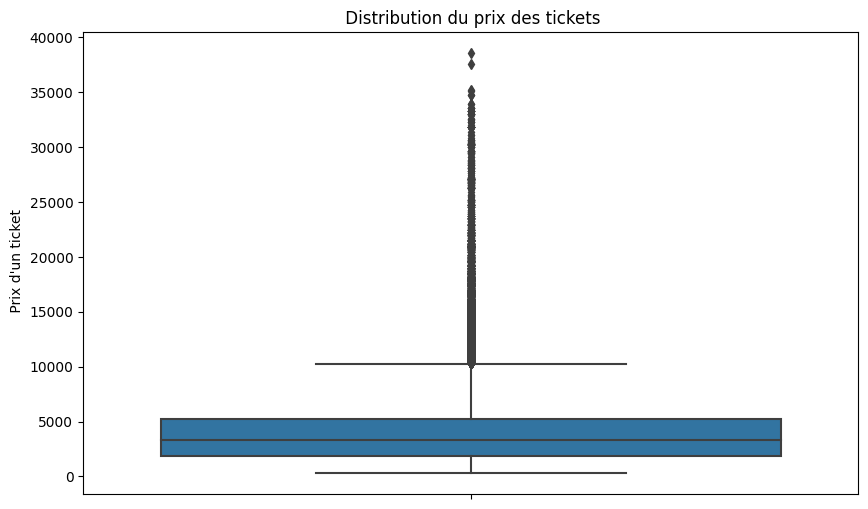

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price_in_cents', data=df_ticket).set_title(' Distribution du prix des tickets')
plt.ylabel(' Prix d\'un ticket')
plt.show()

La distribution des prix tout transport confondu indique la présence de valeurs extêmes. Les prix ne semblent pas vraiment comparables.

Nous allons regarder cette distribution de plus près en visualisant par exemple les prix par type de transport ou par compagnie.

In [88]:
df_final.filter(items=['o_city','d_city','price_in_cents',
                       'transport_type']).drop_duplicates().groupby(by=['transport_type']).agg({'price_in_cents': ['min', 'max','mean']})

price_in_cents                    
                          min    max         mean
transport_type                                   
bus                       850  14596  3594.108434
carpooling               1990   4777  3868.800000
train                    2400   5200  3484.285714

> Le prix d'un ticket de bus est comprix entre 850 centimes et 14596 centimes avec une moyenne d'environ 3594 centimes.\
> Le prix d'un ticket de train coûte entre 2400 et 5200 centimes avec une moyenne de 3484 centimes.\
> S'agissant du covoiturage, le prix du ticket varie entre 1990  et 4777 pour une moyenne de 3869 centimes.

> On peut également obtenir ces résultats graphiquement comme suit:

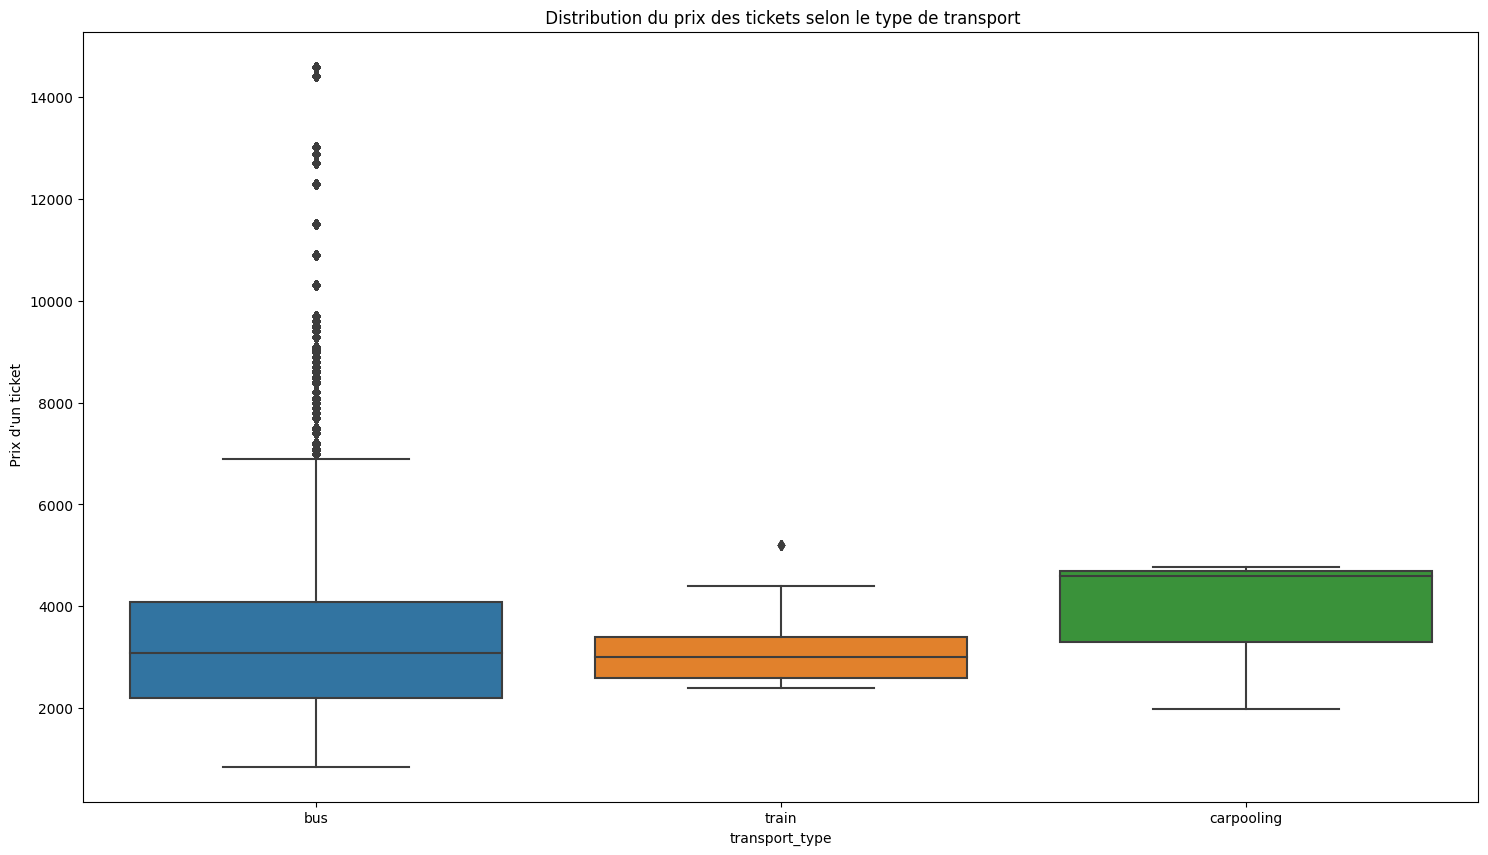

In [89]:
plt.figure(figsize=(18,10))
sns.boxplot(x='transport_type',y='price_in_cents', data=df_final).set_title(' Distribution du prix des tickets selon le type de transport')
plt.ylabel(' Prix d\'un ticket')
plt.show()

> Visualisons à présent les prix des tickets selon la compagnie de transport.

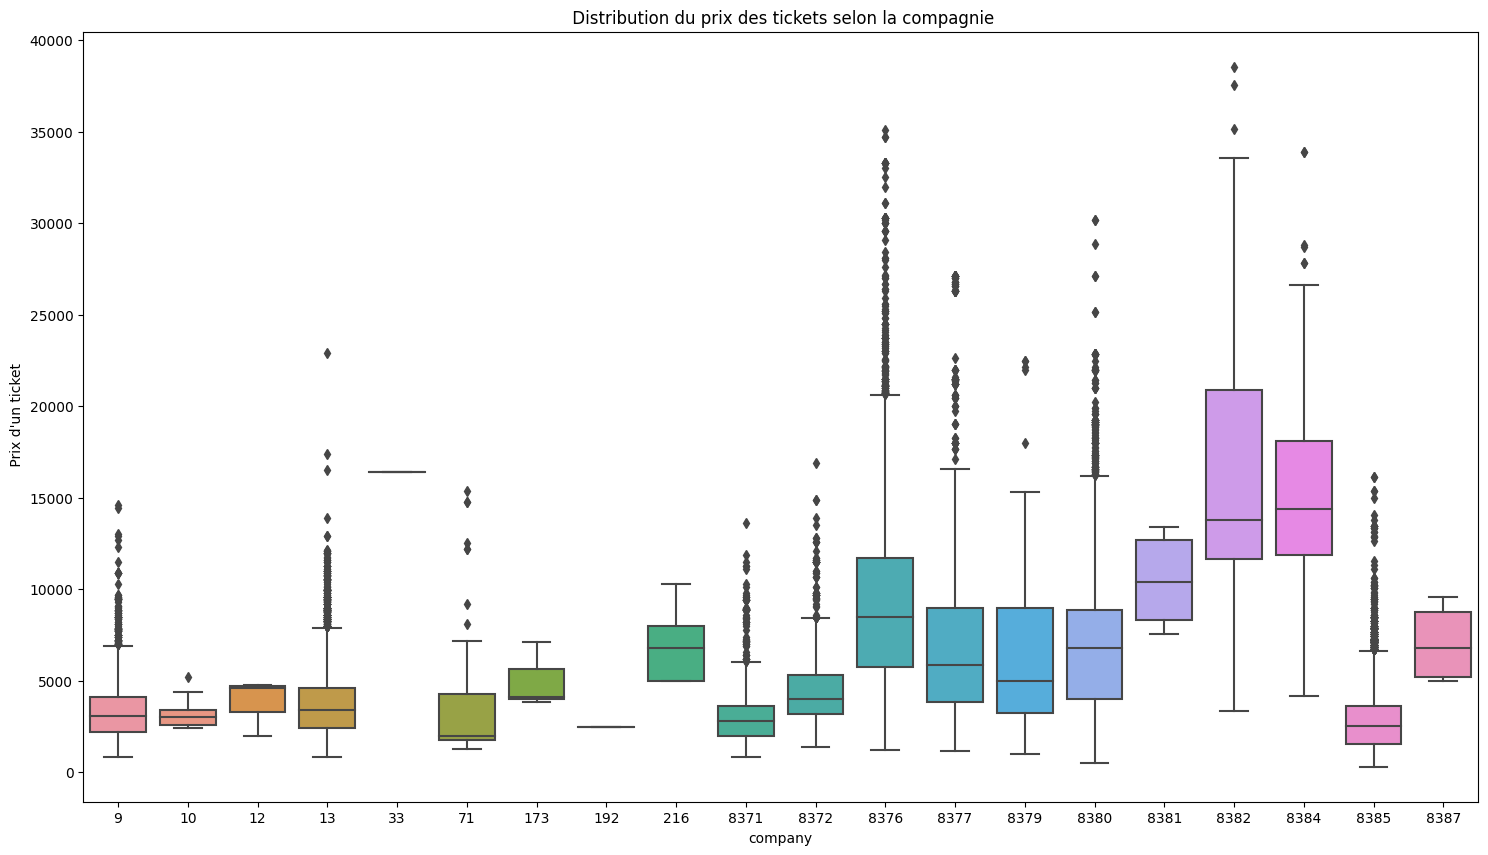

In [90]:
plt.figure(figsize=(18,10))
sns.boxplot(x='company',y='price_in_cents', data=df_ticket).set_title(' Distribution du prix des tickets selon la compagnie')
plt.ylabel(' Prix d\'un ticket')
plt.show()

> On obtient la même chose avec df_final

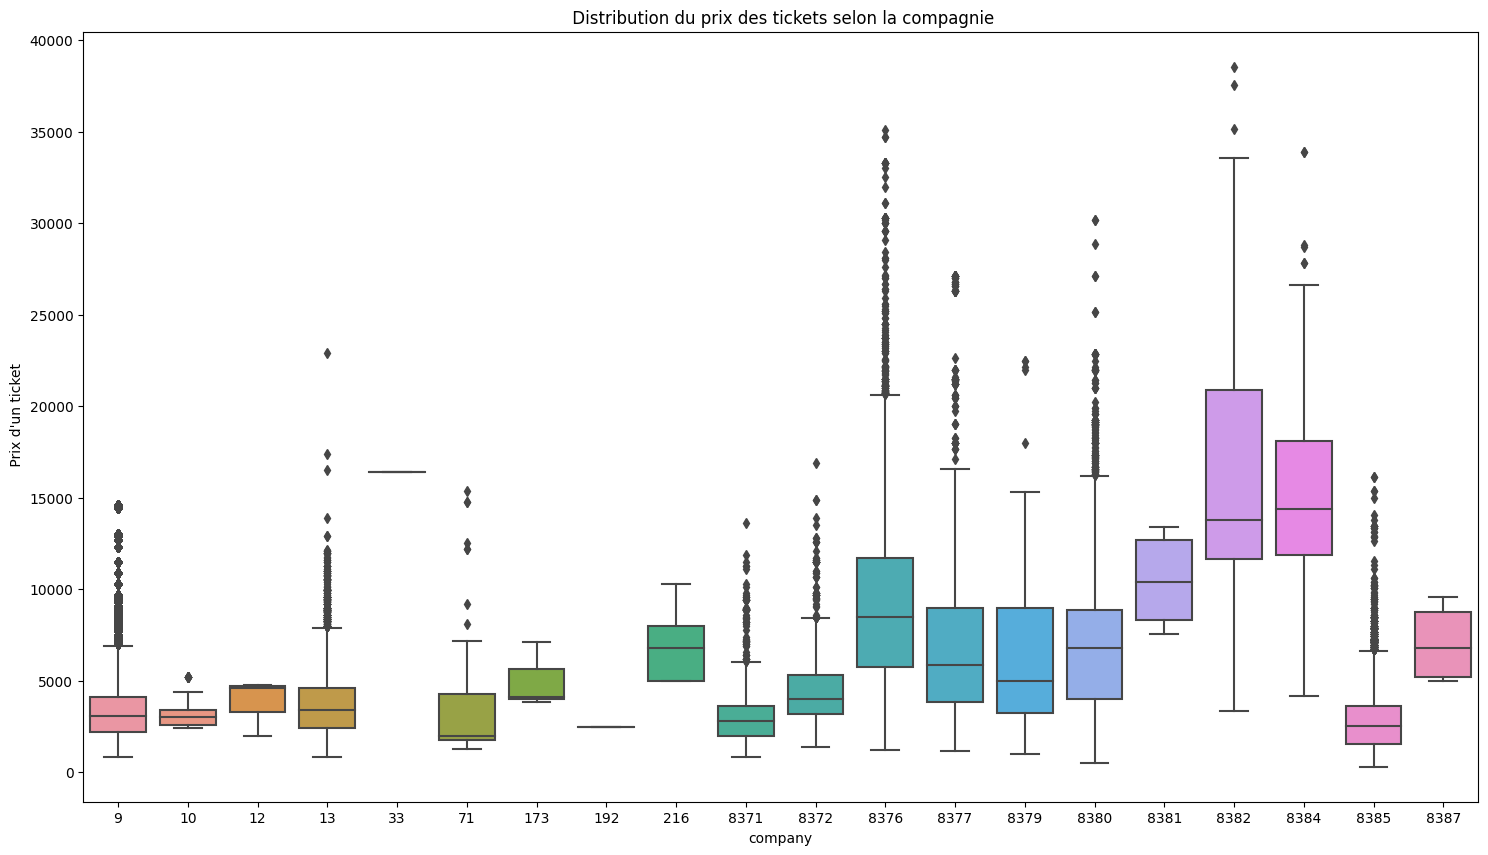

In [91]:
plt.figure(figsize=(18,10))
sns.boxplot(x='company',y='price_in_cents', data=df_final).set_title(' Distribution du prix des tickets selon la compagnie')
plt.ylabel(' Prix d\'un ticket')
plt.show()

> On construit des dataframe par type de transport

In [92]:
df_bus= df_final[df_final['transport_type']=='bus']
print(df_bus.shape)
df_bus.head()

(715569, 39)


,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,durée,durée_jours
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,NaN,distribusion,Distribusion,False,False,False,False,bus,0 days 17:50:00,0.743056
2,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus,0 days 17:50:00,0.743056
3,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus,0 days 17:50:00,0.743056
4,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,37,ostfrieslandexpress,OstfrieslandExpress,False,False,False,False,bus,0 days 17:50:00,0.743056
5,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,41,icBus,IC Bus,False,False,False,False,bus,0 days 17:50:00,0.743056


In [93]:
df_train= df_final[df_final['transport_type']=='train']
print(df_train.shape)
df_train.head()

(90, 39)


,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,durée,durée_jours
54451,6799276,10,39.0,3.0,2017-10-05 13:15:00+00:00,2017-10-05 20:45:00+00:00,2400,2017-10-02 17:33:20.758000+00:00,"{396,396}",{9},...,NaN,vsc,Voyages SNCF,False,False,False,False,train,0 days 07:30:00,0.3125
54452,6799276,10,39.0,3.0,2017-10-05 13:15:00+00:00,2017-10-05 20:45:00+00:00,2400,2017-10-02 17:33:20.758000+00:00,"{396,396}",{9},...,0,trainter,TER,False,False,True,False,train,0 days 07:30:00,0.3125
54453,6799276,10,39.0,3.0,2017-10-05 13:15:00+00:00,2017-10-05 20:45:00+00:00,2400,2017-10-02 17:33:20.758000+00:00,"{396,396}",{9},...,1,tgv,TGV,False,False,True,False,train,0 days 07:30:00,0.3125
54454,6799276,10,39.0,3.0,2017-10-05 13:15:00+00:00,2017-10-05 20:45:00+00:00,2400,2017-10-02 17:33:20.758000+00:00,"{396,396}",{9},...,2,corailintercite,Intercités,False,False,True,False,train,0 days 07:30:00,0.3125
54455,6799276,10,39.0,3.0,2017-10-05 13:15:00+00:00,2017-10-05 20:45:00+00:00,2400,2017-10-02 17:33:20.758000+00:00,"{396,396}",{9},...,3,tramtrain,Tramtrain,False,False,True,False,train,0 days 07:30:00,0.3125


In [94]:
df_carpool= df_final[df_final['transport_type']=='carpooling']
print(df_carpool.shape)
df_carpool.head()

(5, 39)


,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,durée,durée_jours
566260,6848395,12,283.0,1595.0,2017-10-27 06:00:00+00:00,2017-10-27 17:45:00+00:00,4687,2017-10-14 19:01:07.915000+00:00,"{561,8813}",{71},...,NaN,idvroom,idVroom,False,False,False,False,carpooling,0 days 11:45:00,0.489583
566261,6848396,12,283.0,1593.0,2017-10-27 06:00:00+00:00,2017-10-27 17:20:00+00:00,4777,2017-10-14 19:01:07.915000+00:00,"{561,561}",{71},...,NaN,idvroom,idVroom,False,False,False,False,carpooling,0 days 11:20:00,0.472222
613844,6852979,12,523.0,86.0,2017-10-30 21:30:00+00:00,2017-10-31 11:45:00+00:00,1990,2017-10-16 08:10:00.399000+00:00,"{458,458}",{13},...,NaN,idvroom,idVroom,False,False,False,False,carpooling,0 days 14:15:00,0.593750
629854,6853589,12,283.0,523.0,2017-12-22 18:30:00+00:00,2017-12-23 04:25:00+00:00,4590,2017-10-16 10:12:35.105000+00:00,"{330,330}",{13},...,NaN,idvroom,idVroom,False,False,False,False,carpooling,0 days 09:55:00,0.413194
656064,6856599,12,283.0,523.0,2017-11-03 18:30:00+00:00,2017-11-04 03:55:00+00:00,3300,2017-10-16 20:12:19.537000+00:00,"{330,330}",{13},...,NaN,idvroom,idVroom,False,False,False,False,carpooling,0 days 09:25:00,0.392361


> On visualise les prix des tickets des tranports selon qu'ils proposent un wifi à bord ou non.

In [95]:
df_bus['has_wifi'].value_counts()

False    715569
Name: has_wifi, dtype: int64

In [96]:
df_carpool['has_wifi'].value_counts()

False    5
Name: has_wifi, dtype: int64

> Comme on peut le constater, aucune compagnie de transport de bus ou de covoiturage ne propose un wifi à bord.

In [97]:
df_train['has_wifi'].value_counts()

False    81
True      9
Name: has_wifi, dtype: int64

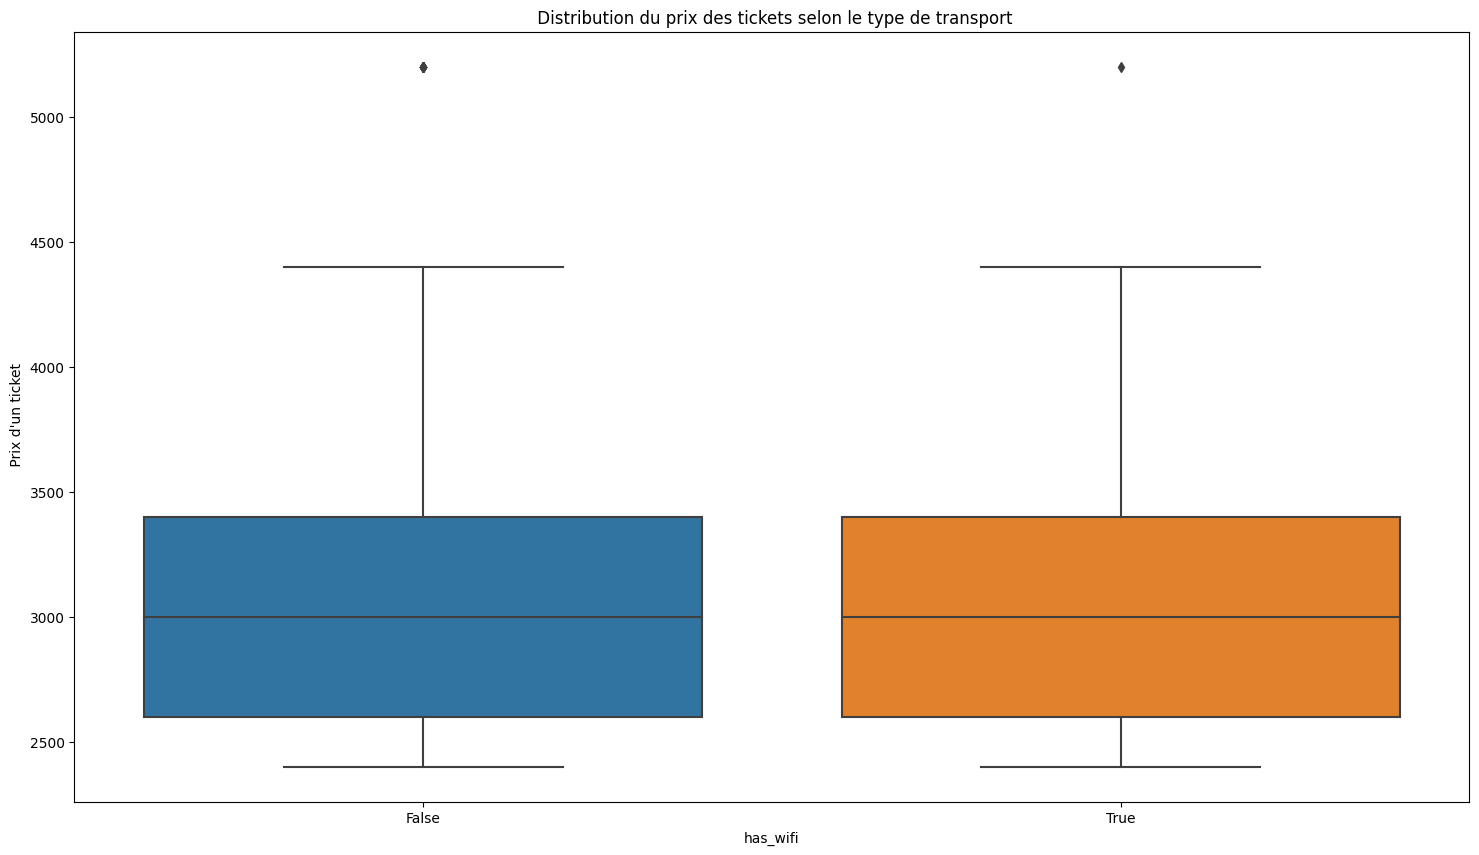

In [98]:
plt.figure(figsize=(18,10))
sns.boxplot(x='has_wifi',y='price_in_cents',data=df_train).set_title(' Distribution du prix des tickets selon le type de transport')
plt.ylabel(' Prix d\'un ticket')
plt.show()

> Pour le train, on remarque que les prix proposés sont à peu près les mêmes selon la présence de  wifi ou non.

> On regarde à présent à quoi ressemble les prix selon le type de transport et le fait que le sièges soient  modulables.

In [99]:
df_final.dtypes

id_ticket                             int64
company                               int64
o_station                           float64
d_station                           float64
departure_ts            datetime64[ns, UTC]
arrival_ts              datetime64[ns, UTC]
price_in_cents                        int64
search_ts               datetime64[ns, UTC]
middle_stations                      object
other_companies                      object
o_city                                int64
d_city                                int64
local_name_o                         object
unique_name_o                        object
latitude_o                          float64
longitude_o                         float64
population_o                        float64
local_name_d                         object
unique_name_d                        object
latitude_d_x                        float64
longitude_d                         float64
population_d                        float64
unique_name_so                  

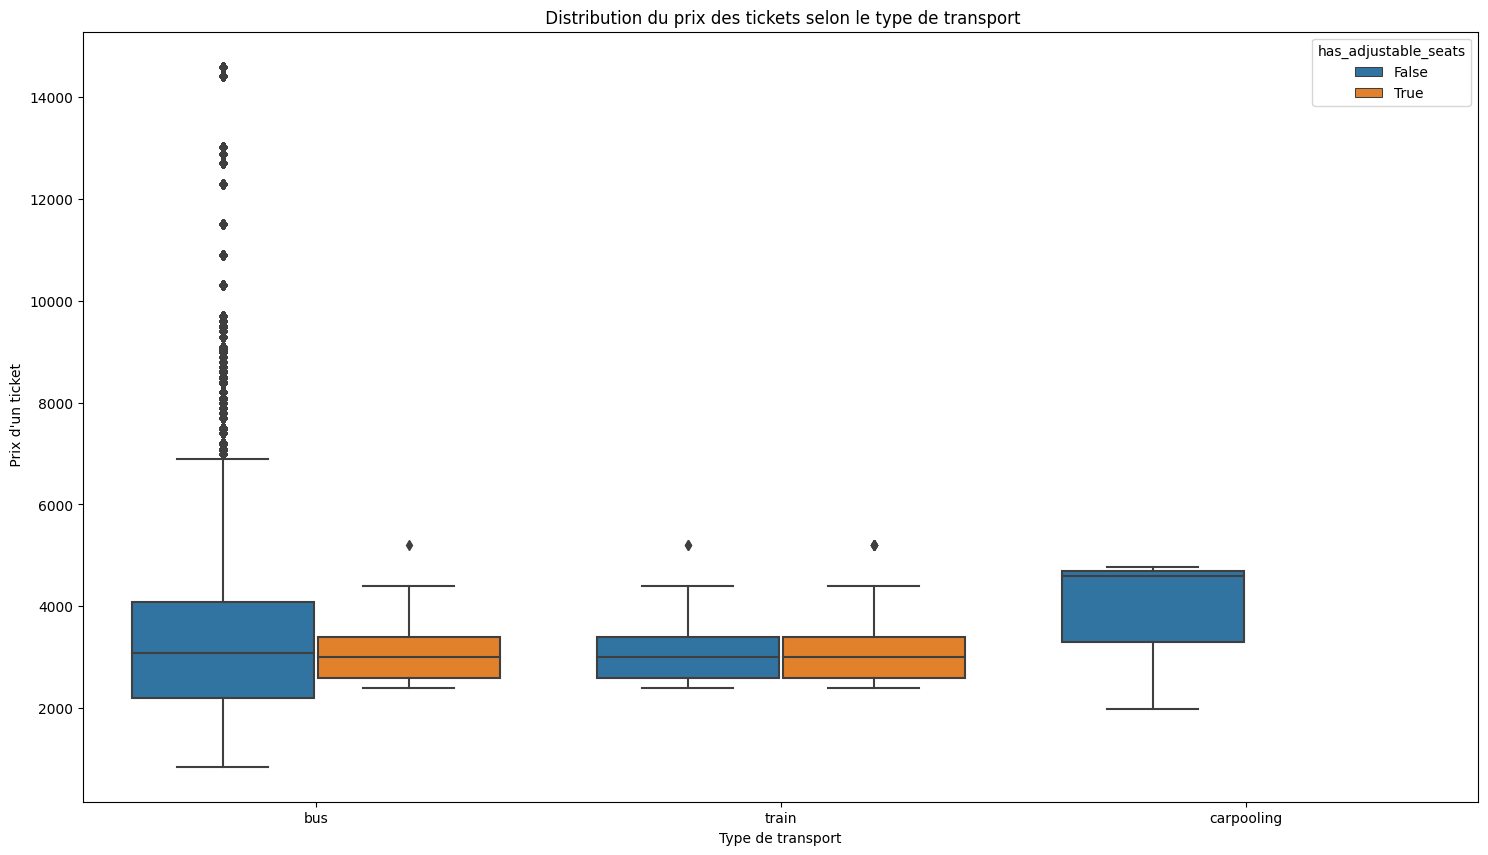

In [100]:
plt.figure(figsize=(18,10))
sns.boxplot(x='transport_type',y='price_in_cents',hue='has_adjustable_seats' ,data=df_final).set_title(' Distribution du prix des tickets selon le type de transport')
plt.xlabel('Type de transport')
plt.ylabel(' Prix d\'un ticket')
plt.show()

> Le graphique indique que les prix des tickets dans les bus et les trains ne dépendent pas vraiment du fait de la présence de sièges modulables à l'intérieur.

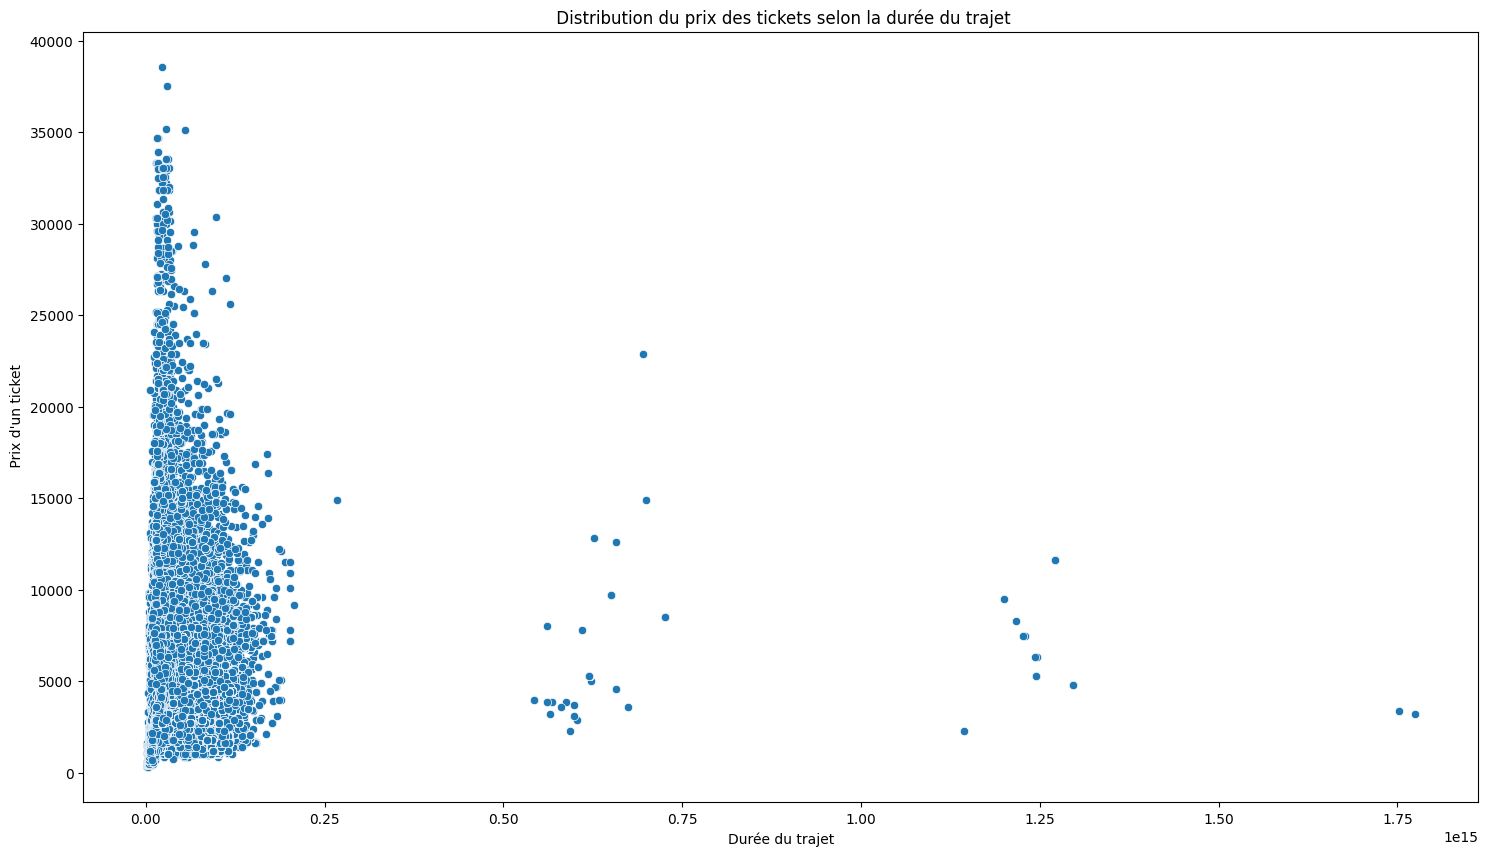

In [101]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='durée',y='price_in_cents',data=df_final).set_title(' Distribution du prix des tickets selon la durée du trajet')
plt.xlabel('Durée du trajet')
plt.ylabel(' Prix d\'un ticket')
plt.show()

> Les prix ne semblent pas dépendrent de la durée du trajet effecté.

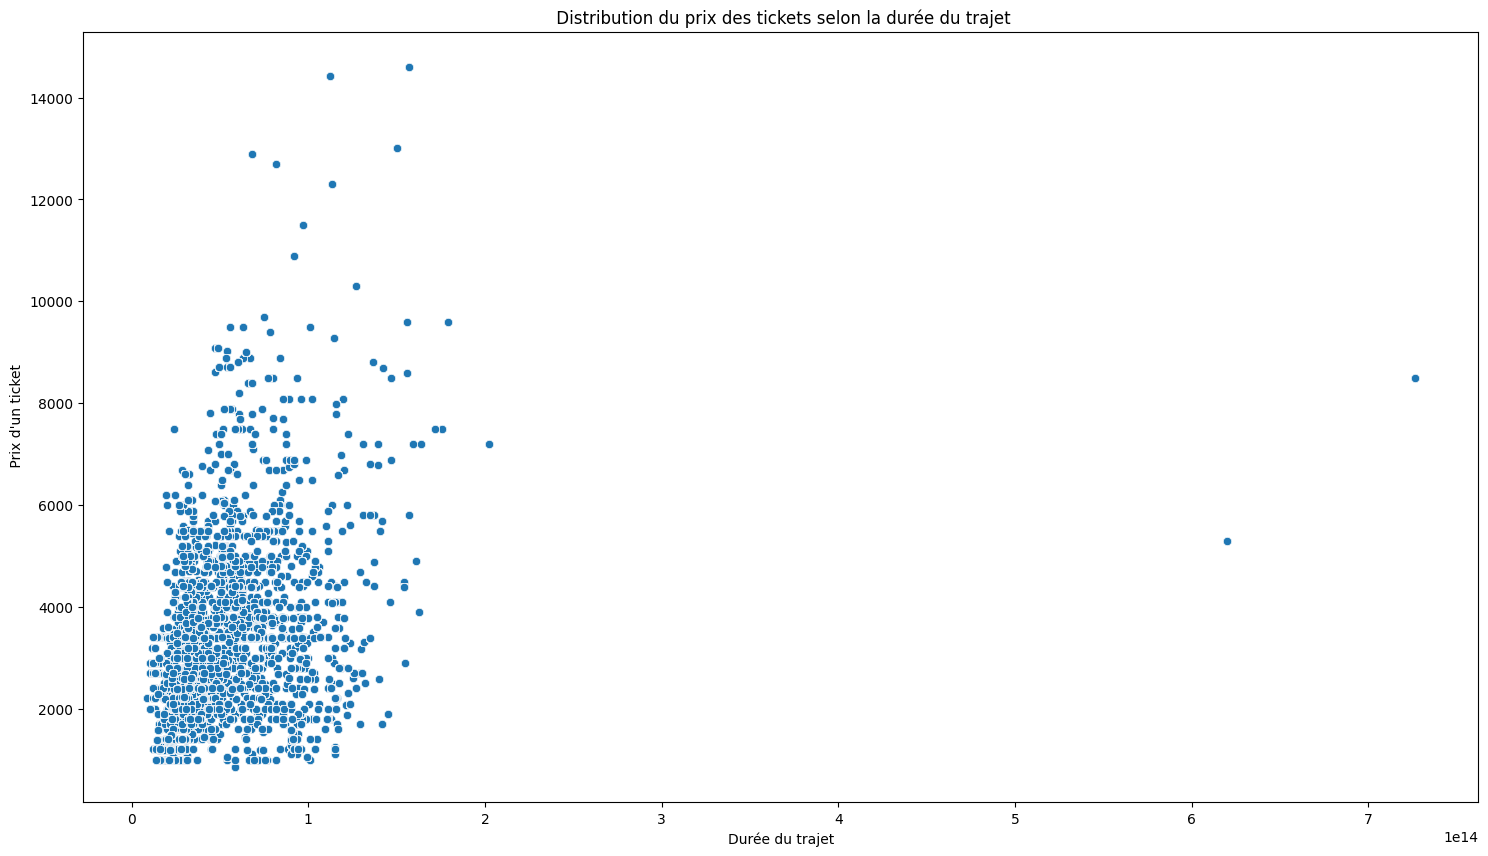

In [102]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='durée',y='price_in_cents',data=df_bus).set_title(' Distribution du prix des tickets selon la durée du trajet')
plt.xlabel('Durée du trajet')
plt.ylabel(' Prix d\'un ticket')
plt.show()

> On obtient le même constat en considérnat uniquement les bus.

>##  ***Durée min, moyen, max***

In [103]:
df_ticket.filter(items=['o_city','d_city','durée','durée_jours',
                       ]).drop_duplicates()['durée'].describe()

count                        17505
mean     0 days 10:42:47.184233076
std      0 days 13:44:11.515457227
min                0 days 00:20:00
25%                0 days 04:20:00
50%                0 days 07:30:00
75%                0 days 13:51:00
max               20 days 12:51:00
Name: durée, dtype: object

> La durée d'un trajet est comprise entre 20 minutes et 20 jours 12heures51 minutes ( ce qui parait quand même surprénant) avec une moyenne de 10 heures 42 minutes.

In [104]:
df_ticket[df_ticket['durée']=='20 days 12:51:00']

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,durée,durée_jours
5175,6800200,8372,860.0,396.0,2017-10-27 23:59:00+00:00,2017-11-17 12:50:00+00:00,3200,2017-10-02 20:39:10.750000+00:00,"{10760,10144}",{9},126,453,20 days 12:51:00,20.535417


> On enlève la ligne et on regarde ce qui se passe :

In [105]:
df_ticket.drop(index=[5175]).filter(items=['o_city','d_city','durée','durée_jours',
                       ]).drop_duplicates()['durée'].describe()

count                        17504
mean     0 days 10:41:08.024451553
std      0 days 13:14:40.829589591
min                0 days 00:20:00
25%                0 days 04:20:00
50%                0 days 07:30:00
75%                0 days 13:51:00
max               20 days 06:41:00
Name: durée, dtype: object

> Un tajet étant caractérisé par une ville de départ et une ville d'arrivée, les calculs doivent en tenir compte.\
> Les durées moyenne, minimale et maximale sont donnée par le tableau suivant:

In [106]:
df_ticket.filter(items=['o_city','d_city','durée','durée_jours',
                       ]).drop_duplicates().groupby(by=['o_city','d_city']).agg({'durée_jours': ['min', 'max','mean']})

durée_jours                    
                      min       max      mean
o_city d_city                                
5      23        0.370139  0.662500  0.429722
6      227       0.516667  0.625694  0.571181
       504       0.233333  0.513889  0.336969
       628       0.402778  0.604167  0.506944
       845       0.041667  0.174306  0.079552
...                   ...       ...       ...
11938  126       0.229167  1.472222  0.476307
12124  1064      0.465278  0.965278  0.715278
12166  857       0.913194  0.913194  0.913194
12190  639       0.048611  0.111111  0.072917
       8937      0.381944  0.381944  0.381944

[1437 rows x 3 columns]

> Autre manière avec df_final aboutissant aux mêmes résultats.

In [107]:
result = df_final.groupby(['o_city','d_city']).agg({'durée_jours': ['min', 'max','mean']})
result

durée_jours                    
                      min       max      mean
o_city d_city                                
5      23        0.370139  0.662500  0.429722
6      227       0.516667  0.625694  0.571181
       504       0.233333  0.513889  0.345417
       628       0.402778  0.604167  0.506944
       845       0.041667  0.174306  0.055493
...                   ...       ...       ...
11938  126       0.229167  1.472222  0.309221
12124  1064      0.465278  0.965278  0.962803
12166  857       0.913194  0.913194  0.913194
12190  639       0.048611  0.111111  0.061728
       8937      0.381944  0.381944  0.381944

[1437 rows x 3 columns]

**On peut également visualiser ces résultats sur un graphique.**

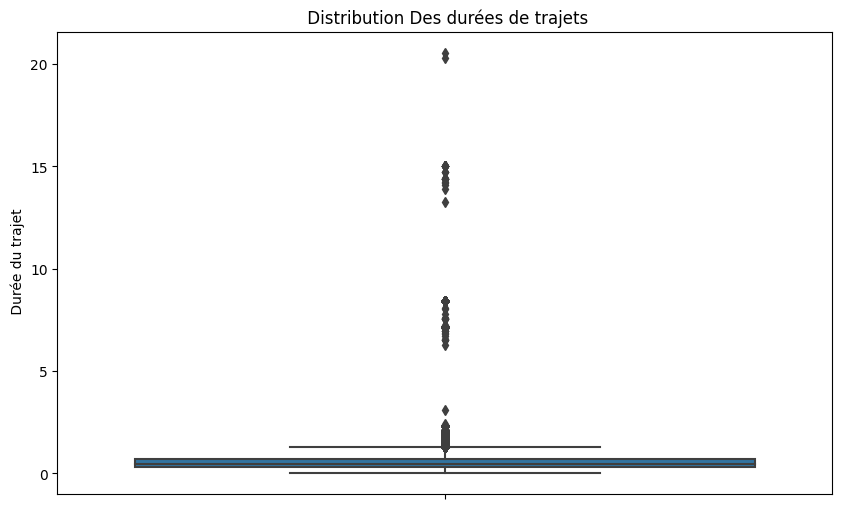

In [108]:
plt.figure(figsize=(10,6))
sns.boxplot(y='durée_jours', data=df_final).set_title(' Distribution Des durées de trajets')
plt.ylabel(' Durée du trajet')
plt.show()

> Le graphique montre la présence de valeurs fortement extrêmes. Leur présence peut fausser toute analyse.

Nous regarder cette distribution de plus près en visualisant par exemple les durées par type de transport .

In [109]:
df_final.filter(items=['o_city','d_city','durée','durée_jours',
                       'transport_type']).drop_duplicates().groupby(by=['transport_type']).agg({'durée': ['min', 'max','mean']})

durée                                          
                           min             max                      mean
transport_type                                                          
bus            0 days 02:20:00 8 days 09:45:00 0 days 15:38:11.367187500
carpooling     0 days 09:25:00 0 days 14:15:00           0 days 11:20:00
train          0 days 05:45:00 1 days 00:50:00    0 days 13:34:22.500000

> La durée d'un trajet en bus est comprise 2h20 mn et 8 jours 9h 45mn avec une moyenne d'environ 2h20mn.\
> La durée d'un trajet en train dure entre 5h 45mn et 1jour50mn  avec une moyenne de 13h34mn.\
> S'agissant du covoiturage, la durée d'un trajet varie entre 9h25mn  et 14h15mn pour une moyenne de 11h20mn centimes.

> On peut également obtenir ces résultats graphiquement comme suit:

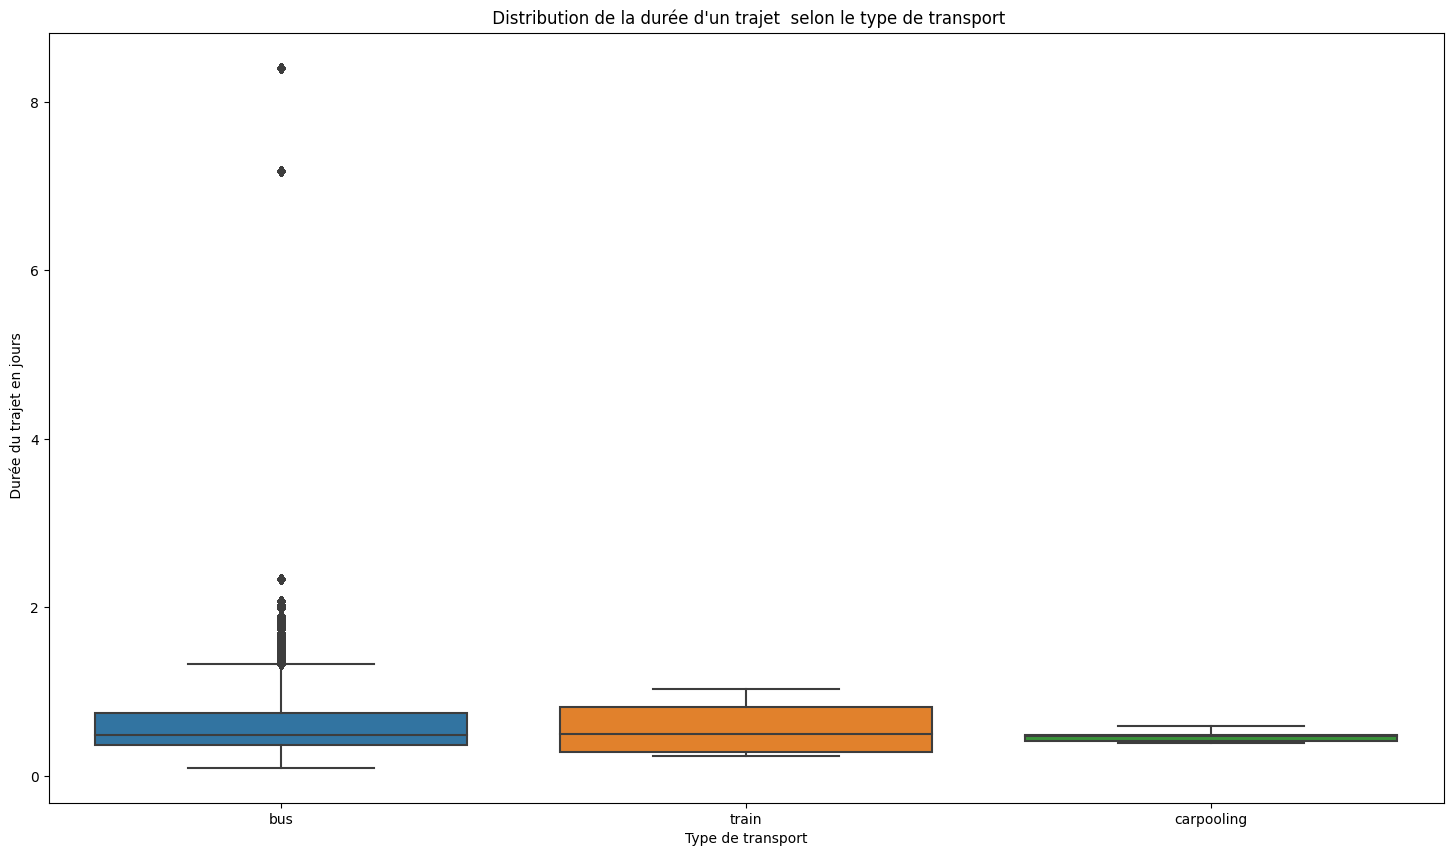

In [110]:
plt.figure(figsize=(18,10))
sns.boxplot(x ='transport_type',y='durée_jours', data=df_final).set_title(' Distribution de la durée d\'un trajet  selon le type de transport')
plt.ylabel(' Durée du trajet en jours')
plt.xlabel('Type de transport')
plt.show()

>##  ***Différence de prix moyen et durée selon le train, le bus et le covoiturage selon la distance du trajet***


In [111]:
df_final.columns

Index(['id_ticket', 'company', 'o_station', 'd_station', 'departure_ts',
       'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations',
       'other_companies', 'o_city', 'd_city', 'local_name_o', 'unique_name_o',
       'latitude_o', 'longitude_o', 'population_o', 'local_name_d',
       'unique_name_d', 'latitude_d_x', 'longitude_d', 'population_d',
       'unique_name_so', 'latitude_so', 'longitude_so', 'unique_name_sd',
       'latitude_d_y', 'longitude_sd', 'company_id', 'provider_id', 'name',
       'fullname', 'has_wifi', 'has_plug', 'has_adjustable_seats',
       'has_bicycle', 'transport_type', 'durée', 'durée_jours'],
      dtype='object')

In [112]:
df_o.shape

(74168, 19)

In [113]:
df_o1= df_o[df_o['o_city']==df_o['id_y']]
print(df_o1.shape)
df_o1.head()

(74168, 19)


,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,id_y,local_name_o,unique_name_o,latitude_o,longitude_o,population_o,type_merge
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,both


In [114]:
df_o1= df_o.drop(columns=['search_ts','middle_stations','other_companies','id_y','local_name_o','type_merge']).rename(columns={'unique_name':'unique_name_o',
                                                                                                   'latitude':'latitude_o','longitude':'longitude_o'
                                                                                                   ,'id_x':'id'})
df_o1.head()

,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,o_city,d_city,unique_name_o,latitude_o,longitude_o,population_o
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,611,542,orleans,47.907018,1.90627,114977.0
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,611,542,orleans,47.907018,1.90627,114977.0
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,611,542,orleans,47.907018,1.90627,114977.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,611,542,orleans,47.907018,1.90627,114977.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,611,542,orleans,47.907018,1.90627,114977.0


In [115]:
import geopy.distance
from pyproj import Geod

In [116]:
wgs84_geod=Geod(ellps='WGS84')

In [117]:
def Distance(lat1,long1,lat2,long2):
    az12,az21,dist= wgs84_geod.inv(lat1,long1,lat2,long2)
    return np.array(dist)/1000
    #return dist

In [118]:
df_final.columns

Index(['id_ticket', 'company', 'o_station', 'd_station', 'departure_ts',
       'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations',
       'other_companies', 'o_city', 'd_city', 'local_name_o', 'unique_name_o',
       'latitude_o', 'longitude_o', 'population_o', 'local_name_d',
       'unique_name_d', 'latitude_d_x', 'longitude_d', 'population_d',
       'unique_name_so', 'latitude_so', 'longitude_so', 'unique_name_sd',
       'latitude_d_y', 'longitude_sd', 'company_id', 'provider_id', 'name',
       'fullname', 'has_wifi', 'has_plug', 'has_adjustable_seats',
       'has_bicycle', 'transport_type', 'durée', 'durée_jours'],
      dtype='object')

> On ajoute une colonne distance a df_final

In [119]:
df_final['dist']=Distance(df_final['latitude_o'].tolist(),
                         df_final['longitude_o'].tolist(),
                         df_final['latitude_d_x'].tolist(),
                         df_final['longitude_d'].tolist())
df_final.head()

,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,durée,durée_jours,dist
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 06:10:00,0.256944,527.532437
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,distribusion,Distribusion,False,False,False,False,bus,0 days 17:50:00,0.743056,527.532437
2,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus,0 days 17:50:00,0.743056,527.532437
3,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus,0 days 17:50:00,0.743056,527.532437
4,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,ostfrieslandexpress,OstfrieslandExpress,False,False,False,False,bus,0 days 17:50:00,0.743056,527.532437


In [120]:
df_final.isnull().sum()

id_ticket                    0
company                      0
o_station                41441
d_station                41441
departure_ts                 0
arrival_ts                   0
price_in_cents               0
search_ts                    0
middle_stations          41441
other_companies          41441
o_city                       0
d_city                       0
local_name_o                 0
unique_name_o                0
latitude_o                   0
longitude_o                  0
population_o            406830
local_name_d                 0
unique_name_d                0
latitude_d_x                 0
longitude_d                  0
population_d            337598
unique_name_so           41441
latitude_so              41441
longitude_so             41441
unique_name_sd           41441
latitude_d_y                 0
longitude_sd             41441
company_id               70594
provider_id              74168
name                     70594
fullname                 70594
has_wifi

In [121]:
df_final['dist'].describe()

count    786258.000000
mean        515.325344
std         256.087271
min          20.487035
25%         334.274543
50%         518.437786
75%         673.997315
max        2670.320082
Name: dist, dtype: float64

> Création d'une nouvelle colonne par rééquitage de la colonne distance.

In [122]:
f = lambda x: '0-200km' if x<=200 else '201-800km' if (x>200) & (x<= 800) else '800-2000km' if (x>800) & (x<= 2000) else '2000+km'
df_final['dist_eq'] = df_final['dist']
df_final['dist_eq'] = df_final['dist_eq'].map(f)
df_final.head()

,id_ticket,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,durée,durée_jours,dist,dist_eq
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 days 06:10:00,0.256944,527.532437,201-800km
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,Distribusion,False,False,False,False,bus,0 days 17:50:00,0.743056,527.532437,201-800km
2,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,Expressbus Munchen,False,False,False,False,bus,0 days 17:50:00,0.743056,527.532437,201-800km
3,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,Berlin Linien Bus,False,False,False,False,bus,0 days 17:50:00,0.743056,527.532437,201-800km
4,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},...,OstfrieslandExpress,False,False,False,False,bus,0 days 17:50:00,0.743056,527.532437,201-800km


In [123]:
df_final['dist_eq'].value_counts()

201-800km     645416
800-2000km     73738
0-200km        66047
2000+km         1057
Name: dist_eq, dtype: int64

> **Le prix  d'un ticket par type de transport et par durée**

In [124]:
df_final.filter(items=['o_city','d_city','price_in_cents','dist_eq',
                       'transport_type']).drop_duplicates().groupby(by=['transport_type','dist_eq']).agg({'price_in_cents': ['min', 'max','mean']})

price_in_cents                    
                                     min    max         mean
transport_type dist_eq                                      
bus            0-200km               850   5890  2135.248227
               2000+km              7200   8800  8120.000000
               201-800km            1000  14596  3422.855167
               800-2000km           2290  12890  5555.024631
carpooling     0-200km              1990   1990  1990.000000
               201-800km            3300   4590  3945.000000
               800-2000km           4687   4777  4732.000000
train          201-800km            2400   5200  3400.000000
               800-2000km           3000   4400  3596.666667

> Ou encore graphiquement:

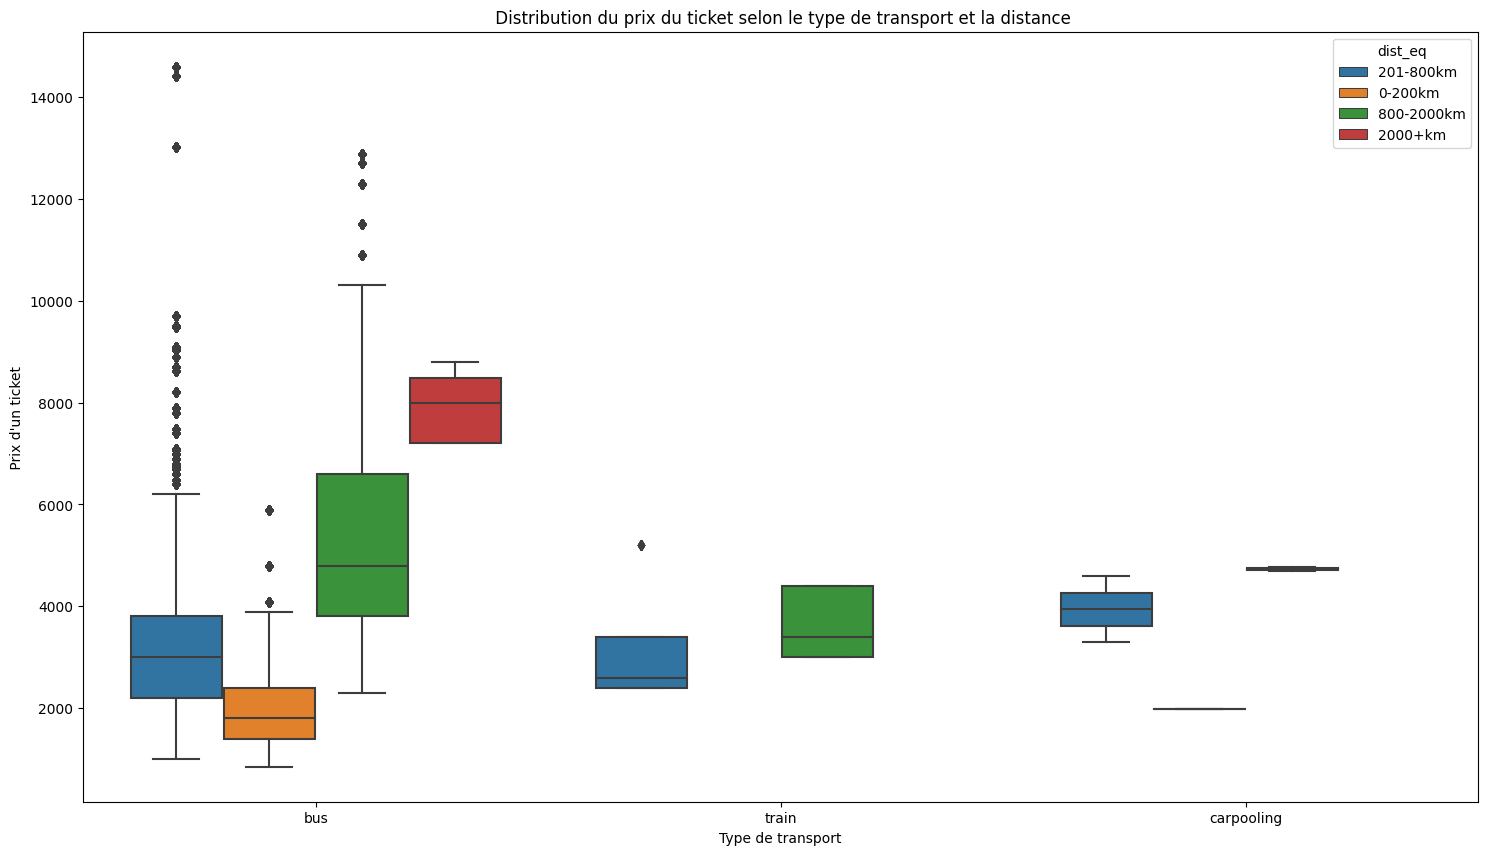

In [125]:
plt.figure(figsize=(18,10))
sns.boxplot(x ='transport_type',y='price_in_cents',hue='dist_eq' ,data=df_final).set_title(' Distribution du prix du ticket selon le type de transport et la distance')
plt.ylabel(' Prix d\'un ticket ')
plt.xlabel('Type de transport')
plt.show()

> Le constat général est que plus la distance est élévée, plus le ticket coûte plus cher et ce quelqu'en soit le moyen de transport.\
> Pour un trajet entre 201 et 800km, le ticket coûte à peu près la même chose quel qu'en soit le type de transport.\
> Cependant, à plus de 800km de trajet, il coûte plus cher de le faire en bus qu'en train.

> **La durée du trajet selon le type de transport et la durée**

In [126]:
df_final.filter(items=['o_city','d_city','durée','durée_jours','dist_eq',
                       'transport_type']).drop_duplicates().groupby(by=['transport_type','dist_eq']).agg({'durée_jours': ['min', 'max','mean']})

durée_jours                    
                                  min       max      mean
transport_type dist_eq                                   
bus            0-200km       0.097222  1.402778  0.466989
               2000+km       1.340278  8.406250  3.013194
               201-800km     0.142361  7.177083  0.617231
               800-2000km    0.468750  2.340278  0.933673
carpooling     0-200km       0.593750  0.593750  0.593750
               201-800km     0.392361  0.413194  0.402778
               800-2000km    0.472222  0.489583  0.480903
train          201-800km     0.239583  0.815972  0.429861
               800-2000km    0.503472  1.034722  0.791667

> Ou encore graphiquement:

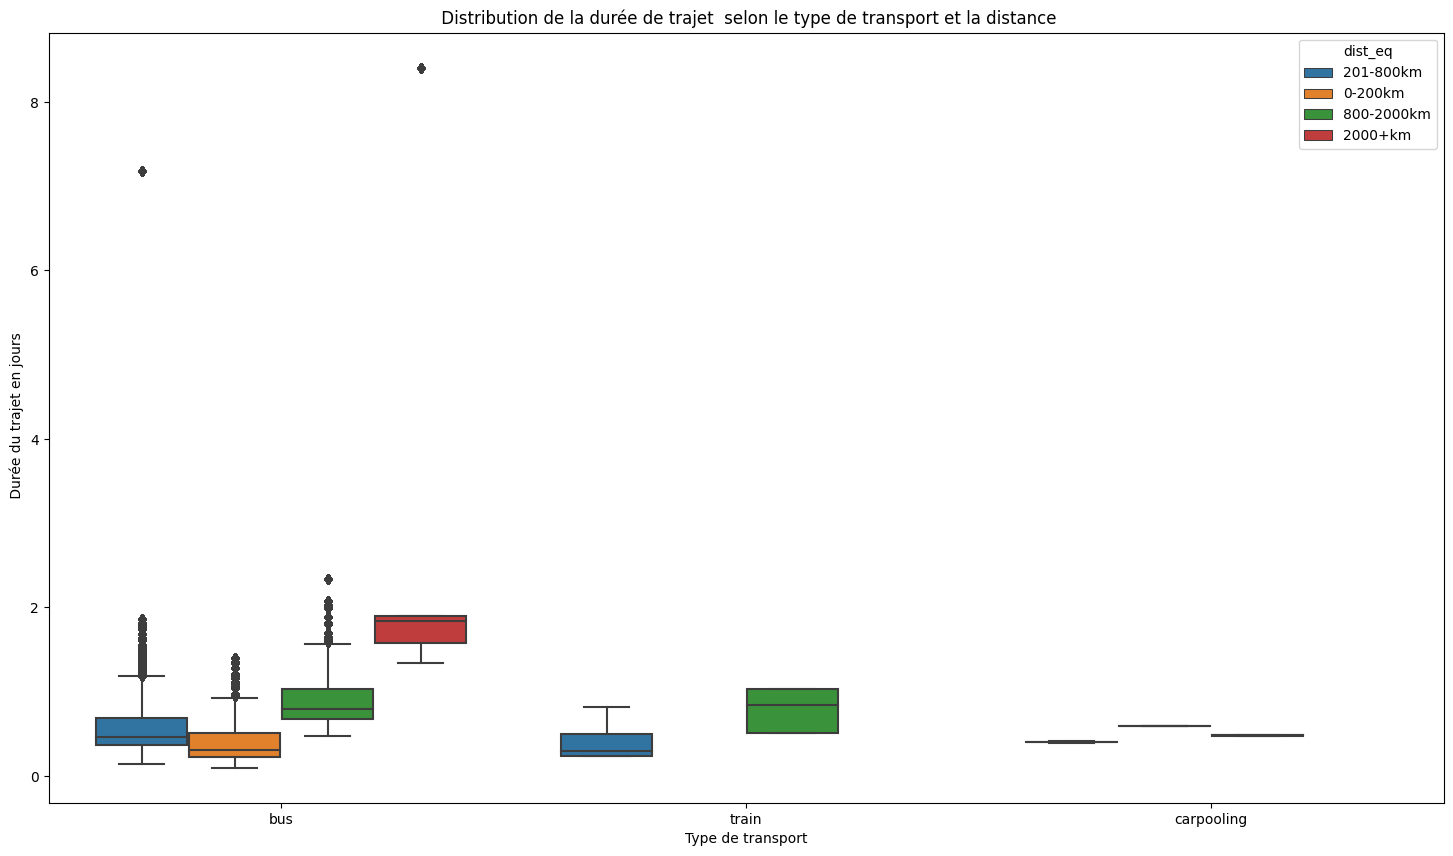

In [127]:
plt.figure(figsize=(18,10))
sns.boxplot(x ='transport_type',y='durée_jours',hue='dist_eq' ,data=df_final).set_title(' Distribution de la durée de trajet  selon le type de transport et la distance')
plt.ylabel(' Durée du trajet en jours')
plt.xlabel('Type de transport')
plt.show()

> Le constat général est que plus le trajet est important, plus il dure beaucoup et ce quelqu'en soit le moyen de transport.\
> Il dure moins de  faire en train qu'en bus.


> Etude des relations potentielles entre certaines variables.\
> Cela guidera le choix des variables à retenir pour la partie Machine Learning.

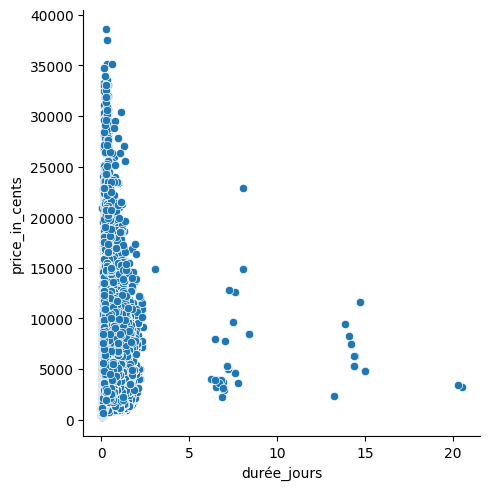

In [128]:
sns.relplot(x = 'durée_jours', y = 'price_in_cents', kind = 'scatter', data = df_final)

plt.show()

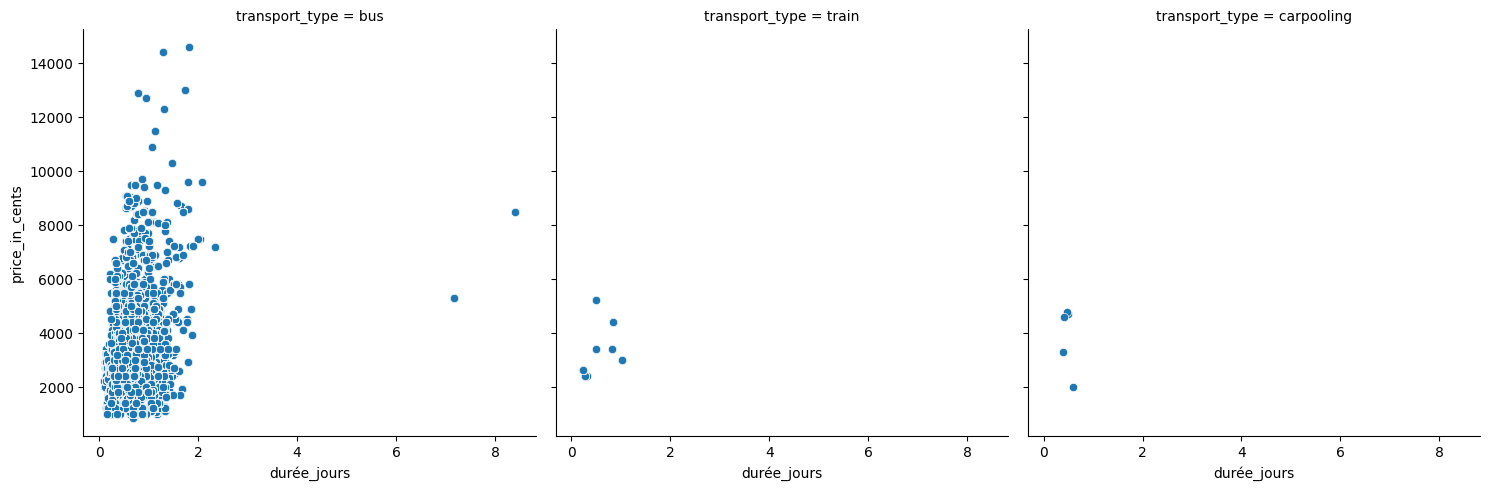

In [129]:
sns.relplot(x = 'durée_jours', y = 'price_in_cents', col = 'transport_type', kind = 'scatter', data = df_final)

plt.show()

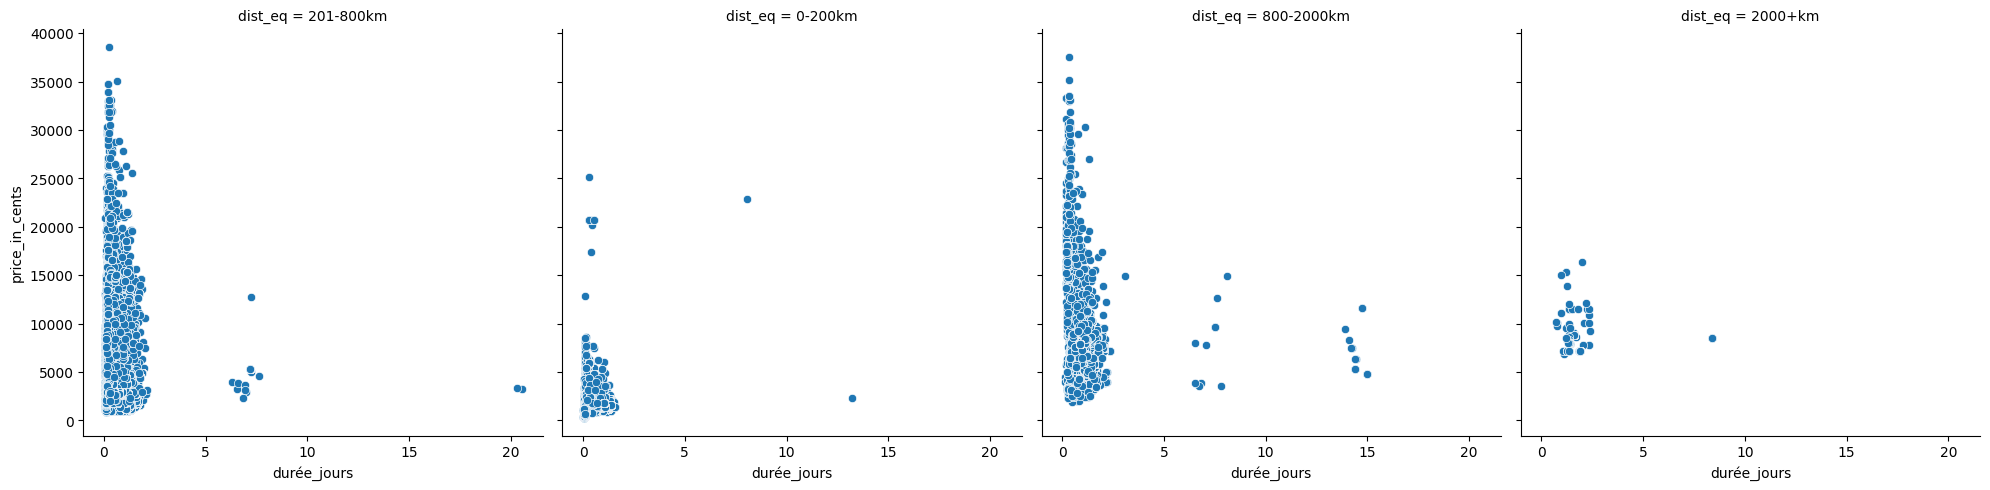

In [130]:
sns.relplot(x = 'durée_jours', y = 'price_in_cents', col = 'dist_eq', kind = 'scatter', data = df_final)

plt.show()

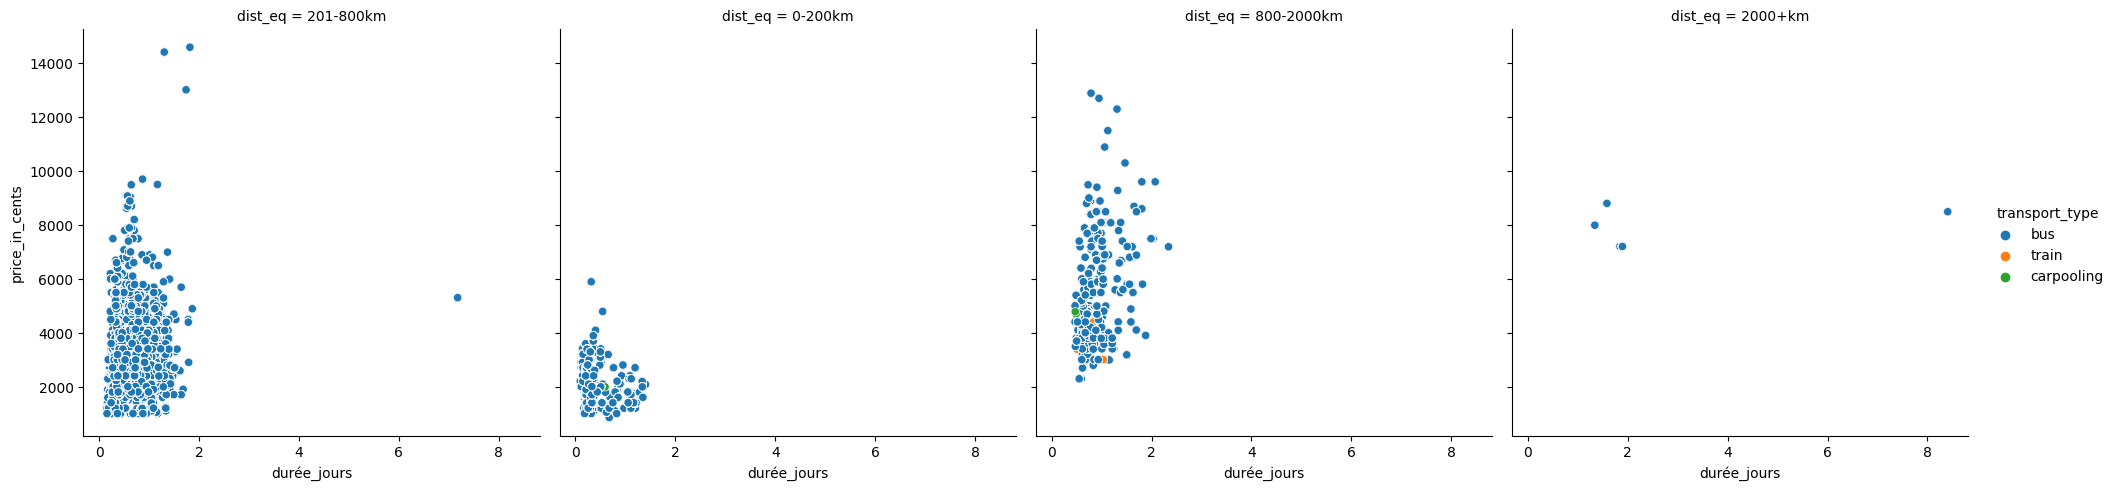

In [131]:
sns.relplot(x = 'durée_jours', y = 'price_in_cents',hue='transport_type' ,col = 'dist_eq', kind = 'scatter', data = df_final)

plt.show()

> ## III-Rapport de soucis dans les données

> * **Impossibilité de comprendre l'origine des valeurs manquantes dans les différentes base de données.**\
> **Ce qui rend difficile de leur appliquer un traitement précis tels suppression, imputation, etc.**
> * ****

> 

> ## IV-Mise en place d'un modèle de Machine Learning pour prédire le prix des tickets

> Constitution de la base de données pour le Machine Learning.\
> Etant donnée les tailles relativement faibles des autres types de transport dans la base, nous allons nous limiter dans cette partie aux bus uniquement.

In [132]:
df_ml= df_final[df_final['transport_type']=='bus'].filter(items=['o_city','d_city','price_in_cents','population_o',
                              'population_d','durée_jours','dist','unique_name_o','unique_name_d','transport_type'])
print(df_ml.shape)

df_ml[df_ml.duplicated()].shape

(715569, 10)


(713523, 10)

In [133]:
df_ml.drop_duplicates(inplace=True)
df_ml.shape

(2046, 10)

In [134]:
df_ml

,o_city,d_city,price_in_cents,population_o,population_d,durée_jours,dist,unique_name_o,unique_name_d,transport_type
1,611,542,1450,114977.0,275318.0,0.743056,527.532437,orleans,montpellier,bus
251,628,453,1990,NaN,233897.0,0.274306,214.659367,paris,lille,bus
453,628,453,1800,NaN,233897.0,1.284722,214.659367,paris,lille,bus
655,628,453,1590,NaN,233897.0,0.173611,214.659367,paris,lille,bus
857,628,453,1100,NaN,233897.0,1.045139,214.659367,paris,lille,bus
...,...,...,...,...,...,...,...,...,...,...
784936,628,126,2700,NaN,246586.0,0.718750,551.611699,paris,bordeaux,bus
785137,628,126,2700,NaN,246586.0,0.472222,551.611699,paris,bordeaux,bus
785544,628,126,3790,NaN,246586.0,0.437500,551.611699,paris,bordeaux,bus
785848,628,562,2400,NaN,298029.0,0.375000,463.777998,paris,nantes,bus


In [135]:
print(df_ml.shape)
df_ml.isnull().sum()

(2046, 10)


o_city               0
d_city               0
price_in_cents       0
population_o      1030
population_d       936
durée_jours          0
dist                 0
unique_name_o        0
unique_name_d        0
transport_type       0
dtype: int64

In [136]:
df_ml.dropna(inplace=True)
df_ml.shape

(490, 10)

In [137]:
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

In [138]:
X = df_ml.drop(['o_city','d_city','price_in_cents','transport_type','unique_name_o','unique_name_d'], axis=1).copy()
X.head()

,population_o,population_d,durée_jours,dist
1,114977.0,275318.0,0.743056,527.532437
3469,246586.0,233897.0,0.593750,761.717828
3671,246586.0,233897.0,0.520833,761.717828
3874,246586.0,233897.0,0.545139,761.717828
4079,246586.0,233897.0,0.590278,761.717828


In [139]:
prix_ticket = df_ml['price_in_cents'].copy()
prix_ticket.head()

1       1450
3469    3100
3671    3390
3874    4090
4079    4100
Name: price_in_cents, dtype: int64

> * **Arbre de décision**

In [140]:
print(X.describe(), prix_ticket.describe())
X_train, X_test, prix_ticket_train, prix_ticket_test = train_test_split(X, prix_ticket, random_state=42)

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
DTR= DecisionTreeRegressor(min_samples_leaf=200)

DTR.fit(X_train, prix_ticket_train)

prix_ticket_test_pred_DTR = DTR.predict(X_test)

from sklearn.metrics import mean_squared_error
MSE_DTR=mean_squared_error(prix_ticket_test_pred_DTR, prix_ticket_test)
print("MSE of Single Tree:","%.3f" %  MSE_DTR)

       population_o  population_d  durée_jours         dist
count  4.900000e+02  4.900000e+02   490.000000   490.000000
mean   4.094220e+05  5.470006e+05     0.589527   570.706525
std    1.046959e+06  1.207968e+06     0.297138   238.890898
min    1.043210e+05  1.043210e+05     0.184028    69.302658
25%    1.361250e+05  1.510750e+05     0.392361   381.355201
50%    2.338970e+05  2.338970e+05     0.498264   575.227377
75%    4.662970e+05  5.066150e+05     0.735243   740.401389
max    8.416535e+06  8.416535e+06     1.815972  1599.103857 count      490.000000
mean      3481.993878
std       1481.575051
min       1000.000000
25%       2432.000000
50%       3290.000000
75%       4265.000000
max      14596.000000
Name: price_in_cents, dtype: float64
MSE of Single Tree: 1876017.149


>*  ### Bagging

In [141]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor()
bag = BaggingRegressor(tree, random_state=1)
parameters = {'n_estimators' : [ 50, 100, 200]}
    
optBagg = GridSearchCV(bag, parameters)

optBagg.fit(X_train, prix_ticket_train)
prix_ticket_test_pred_Bagg = optBagg.predict(X_test)

from sklearn.metrics import mean_squared_error
MSE_Bagg=mean_squared_error(prix_ticket_test_pred_Bagg, prix_ticket_test)
print("MSE of Bagging of Trees:","%.3f" %  MSE_Bagg)

MSE of Bagging of Trees: 1000449.284


> * ### Random Forest

In [142]:
from sklearn.ensemble import RandomForestRegressor  #useful if we want to compute the importance of features

RF = RandomForestRegressor(tree, 
                        random_state=1)
parameters = {'n_estimators' : [ 100, 200],
            'max_features' : [2,3,4,5]  }
    
optRF = GridSearchCV(RF, parameters)

optRF.fit(X_train, prix_ticket_train)
prix_ticket_test_pred_RF = optRF.predict(X_test)

MSE_RF=mean_squared_error(prix_ticket_test_pred_RF, prix_ticket_test)
print("MSE of Random Forest:","%.3f" %  MSE_RF)


MSE of Random Forest: 983581.470


> **Comparaison des performances**

In [143]:
print("MSE for:\n", 
     "- Single tree: ", "%.3f" % MSE_DTR,"\n",
     "- Bagging of trees: ", "%.3f" % MSE_Bagg,"\n",
     "- Random Forest: ", "%.3f" % MSE_RF
     )

MSE for:
 - Single tree:  1876017.149 
 - Bagging of trees:  1000449.284 
 - Random Forest:  983581.470


> Des trois modèles implémentés, celui qui donne l'erreur la plus faible est le Random Forest.\
> Cependant il faut noter qu'aucune des modèles ne donne vraiment de bonnes performances prédictives. Une raison pourrait être le fait que les variables explicatives retenues n'expliquent pas vraiment les variations du prix des tickets de bus comme nous l'avons pu le remarquer dans la partie analyse descriptive.